# GROUP 5 - DAC INTERNAL PROJECT

### Proposed Problem Statement: 
We are a team of Data Analysts looking into HDB Resale Transactions (2017 - 2024), to advise the Housing Development Board (HDB) and Government stakeholders on implementing Policies to maintain Housing affordability. 


We will address this through:
- Analysis of structural , locational and temporal factors and how it affects resale prices. 
- Developing a predictive machine learning model to understand and estimate resale prices
- Identifying key determinants for policymakers to tackle to maintain housing affordability 



### Deliverables
An interactive prediction model where Real Estate Agents ... (tbc)

- Towns where remaining lease has the steepest price penalty.
- Flat types most sensitive to market fluctuations.
- Predictive model that flags likely future affordability issues.


Deliverable Form:
- Affordability & Price Driver Insights (EDA Findings) - Graphs and commentary

- Predictive Model for Resale Prices - ML Intepretable Model and ML Metrics

In [2]:
from pathlib import Path
print(Path("Tommy Ver(main)_updated.ipynb").resolve())


/Users/tommybub/Desktop/UOL - DAC/Group-5-DAC-internal-project/Tommy Ver(main)_updated.ipynb


## STEP 1: DATA LOADING AND CLEANING

Load Libraries (Importing Foundational Libraries)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Importing Key Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Loading Dataset

In [5]:
# Load dataset
df = pd.read_csv('HDB_Resale_Prices.csv')

Using df.head() and df.sample() to get a quick look into Dataset

In [6]:
# Quick view of first 10 rows of Dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [7]:
# Quick view of random 10 rows of Dataset
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
95180,2021-04,BUKIT PANJANG,4 ROOM,176,LOMPANG RD,22 TO 24,101.0,Model A,1997,75 years 07 months,535888.0
160083,2023-08,SENGKANG,4 ROOM,351D,ANCHORVALE RD,13 TO 15,92.0,Model A,2019,94 years 10 months,608000.0
159286,2023-08,HOUGANG,4 ROOM,337,HOUGANG AVE 7,04 TO 06,91.0,New Generation,1985,61 years,441000.0
101964,2021-07,CHOA CHU KANG,4 ROOM,488B,CHOA CHU KANG AVE 5,10 TO 12,93.0,Model A,2016,93 years 11 months,485000.0
161848,2023-09,KALLANG/WHAMPOA,5 ROOM,3B,UPP BOON KENG RD,04 TO 06,110.0,Improved,2006,81 years 11 months,775000.0
131684,2022-07,TAMPINES,4 ROOM,252,TAMPINES ST 21,01 TO 03,97.0,New Generation,1985,61 years 08 months,505000.0
81848,2020-10,QUEENSTOWN,3 ROOM,93,C'WEALTH DR,04 TO 06,60.0,Standard,1967,45 years 04 months,248000.0
33169,2018-08,BUKIT PANJANG,4 ROOM,182,JELEBU RD,13 TO 15,94.0,Premium Apartment,2003,83 years 09 months,560000.0
1578,2017-02,HOUGANG,4 ROOM,161,HOUGANG ST 11,01 TO 03,101.0,Model A,1997,79 years 10 months,430000.0
71830,2020-06,PASIR RIS,2 ROOM,527B,PASIR RIS ST 51,04 TO 06,47.0,Model A,2015,94 years 03 months,250000.0


Using df.shape, df.info and df.describe to understand Data

In [8]:
df.shape # Pulls number of rows and cols (r,c)

(194170, 11)

In [9]:
df.info() # Pulls info overview of Dataframe -- take note of inconsistencies in Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [10]:
df.describe() # Shows stats summary for numerical values

,floor_area_sqm,lease_commence_date,resale_price
count,194170.000000,194170.000000,1.941700e+05
mean,97.032377,1996.159196,5.062432e+05
std,24.041678,14.129136,1.768102e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.750000e+05
50%,93.000000,1996.000000,4.750000e+05
75%,112.000000,2011.000000,6.050000e+05
max,366.700000,2021.000000,1.588000e+06


### 1.1 Tackling Duplicates and Null Values

Checking for Total No. of Duplicates using df.duplicated().sum()

In [11]:
df.duplicated().sum() # Checking for total number of duplicates -- Note after running code: Found that duplicates are present (Question: Is it normal for this Dataset?)

np.int64(294)

Solving Duplicates, is it meant to be there?

In [12]:
duplicate_rows = df[df.duplicated(keep=False)] # Create an inspectable subset of duplicated rows to check
duplicate_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192280,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
193189,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0


Analysing duplicate_rows subset

In [13]:
duplicate_counts = duplicate_rows.value_counts().reset_index(name='count')
duplicate_counts #Confirming 294 rows of duplicates , and showcasing how many counts of duplicates per type.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,count
0,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,2
1,2019-03,WOODLANDS,4 ROOM,824,WOODLANDS ST 81,04 TO 06,84.0,Simplified,1989,69 years 07 months,300000.0,2
2,2020-03,PUNGGOL,4 ROOM,672D,EDGEFIELD PLAINS,07 TO 09,90.0,Model A,2015,94 years 09 months,420000.0,2
3,2020-01,SENGKANG,4 ROOM,178B,RIVERVALE CRES,16 TO 18,93.0,Model A,2015,94 years 02 months,390000.0,2
4,2019-12,YISHUN,3 ROOM,741,YISHUN AVE 5,07 TO 09,67.0,New Generation,1985,64 years 01 month,282000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-08,BUKIT BATOK,5 ROOM,172,BT BATOK WEST AVE 8,16 TO 18,134.0,Model A,1985,66 years 10 months,470000.0,2
290,2017-08,BISHAN,4 ROOM,146,BISHAN ST 11,10 TO 12,84.0,Simplified,1987,69 years,470000.0,2
291,2017-08,BEDOK,5 ROOM,604,BEDOK RESERVOIR RD,04 TO 06,121.0,Improved,1982,63 years 09 months,470000.0,2
292,2017-08,BEDOK,4 ROOM,762,BEDOK RESERVOIR VIEW,07 TO 09,105.0,Premium Apartment,2000,82 years 04 months,470000.0,2


In [18]:
duplicate_rows.nunique() # Result shows that duplicates are generally very different across multiple categories

month                   72
town                    25
flat_type                6
block                  265
street_name            170
storey_range            12
floor_area_sqm          63
flat_model               9
lease_commence_date     47
remaining_lease        194
resale_price            96
dtype: int64

After analysing duplicates, as Dataset has not unique identifiers in each row (such as specific unit numbers): We will accept duplicates as valid.

Using df.columns to see each column name

In [19]:
df.columns # Pulls each column name

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check for Missing Values (Nan)

In [20]:
# Checking missing values per column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [21]:
# Results show no missing column

In [22]:
#df.dropna(subset=['resale_price'], inplace=True)
#df.isna().sum()

In [23]:
# Results show 1 row dropped

### STEP 2: Exploratory Data Analysis (EDA)

Begin EDA - Categorising Columns by Numerical and Categorical

In [21]:
categorical_cols = df.select_dtypes(include='object').columns # Creating categorical columns by selecting Columns that are dtype ('object')
categorical_cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')

Understanding each Categorical Column and its unique values

In [22]:
for col in categorical_cols: # Pulling categorical columns, unique values per column and showing them in a presentabl format
    print("="*60)
    print(f"Column: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print("- Unique values:")
    print(df[col].unique())
    print("="*60 + "\n")

Column: month
Total unique values: 95
- Unique values:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '

In [23]:
numerical_cols = df.select_dtypes(include=np.number).columns # Creating a list of numerical columns by selecting Columns that are dtype ('np.numbers' = anything considered a numerical type by NumPy)
numerical_cols

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [27]:
for num in numerical_cols:
    print("="*60)
    print(f"Column: {num}")
    print(f"Total unique values: {df[num].nunique()}")
    print("- Unique values:")
    print(df[num].unique())
    print("="*60 + "\n")

Column: floor_area_sqm
Total unique values: 159
- Unique values:
[ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 179.  162.
  83.1 172.  168.  160.  249.  185.   38.  178.  171.  237.  183.  190.

### STEP 2.1
- price_per_sqm = resale_price / floor_area_sqm
- flat_age = trans_year - lease_commence_date
- changing remaining_lease (string/object) into remaining_lease_years (float)

Price Per SQM Column
- Important feature to have as it puts resale_price into scale for different sized flats

In [24]:
df_upd = df.copy()
df_upd['price_per_sqm'] = df_upd['resale_price'] / df_upd['floor_area_sqm']
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm
146754,2023-02,JURONG WEST,5 ROOM,322,TAH CHING RD,07 TO 09,121.0,Improved,1997,73 years 07 months,610000.0,5041.322314
45324,2019-03,BUKIT PANJANG,5 ROOM,453,FAJAR RD,07 TO 09,121.0,Improved,1997,77 years 04 months,370000.0,3057.851240
74140,2020-07,JURONG WEST,EXECUTIVE,680A,JURONG WEST CTRL 1,10 TO 12,134.0,Premium Apartment,2000,78 years 11 months,596000.0,4447.761194
93961,2021-03,SENGKANG,4 ROOM,410C,FERNVALE RD,04 TO 06,95.0,Premium Apartment,2012,90 years 09 months,442000.0,4652.631579
1417,2017-02,BUKIT PANJANG,5 ROOM,244,BT PANJANG RING RD,04 TO 06,122.0,Improved,1988,70 years 10 months,400000.0,3278.688525
129340,2022-06,TAMPINES,3 ROOM,217,TAMPINES ST 23,10 TO 12,67.0,New Generation,1986,62 years 09 months,395000.0,5895.522388
134841,2022-09,BUKIT BATOK,4 ROOM,194A,BT BATOK WEST AVE 6,19 TO 21,92.0,Premium Apartment,2017,93 years 11 months,698000.0,7586.956522
28779,2018-06,CHOA CHU KANG,5 ROOM,118,TECK WHYE LANE,10 TO 12,121.0,Improved,1989,69 years 09 months,402000.0,3322.314050
64735,2020-01,CHOA CHU KANG,4 ROOM,294,CHOA CHU KANG AVE 2,13 TO 15,103.0,Model A,1990,69 years 05 months,352888.0,3426.097087
140171,2022-11,PUNGGOL,4 ROOM,684D,EDGEDALE PLAINS,01 TO 03,93.0,Premium Apartment,2018,94 years 10 months,575000.0,6182.795699


Flat Age (trans_year) - (remaining_lease_years)
- Add Transaction Year ('trans_year') into the Dataframe from datetime Column 'Month'
- Add in Flat Age : Easier feature to analyse when it comes to 'age' of flat / longevity / lifespan

In [25]:
# Extract the transaction year from the 'month' column
df_upd['trans_year'] = pd.to_datetime(df_upd['month']).dt.year

# Calculate flat_age
df_upd['flat_age'] = df_upd['trans_year'] - df_upd['lease_commence_date']

# Display a sample of the updated DataFrame with the new 'flat_age' column
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
135438,2022-09,HOUGANG,EXECUTIVE,538,HOUGANG ST 52,07 TO 09,147.0,Maisonette,1992,69 years 01 month,880000.0,5986.394558,2022,30
82677,2020-10,YISHUN,4 ROOM,442,YISHUN AVE 11,07 TO 09,93.0,Model A,2012,90 years 10 months,408000.0,4387.096774,2020,8
157638,2023-07,SEMBAWANG,4 ROOM,362B,SEMBAWANG CRES,07 TO 09,93.0,Model A,2019,94 years 11 months,560000.0,6021.505376,2023,4
97695,2021-05,HOUGANG,4 ROOM,573,HOUGANG ST 51,04 TO 06,100.0,Model A,1997,75 years 02 months,412000.0,4120.000000,2021,24
139953,2022-11,KALLANG/WHAMPOA,3 ROOM,23,BENDEMEER RD,01 TO 03,78.0,Improved,1972,48 years 03 months,358888.0,4601.128205,2022,50
30329,2018-07,BEDOK,3 ROOM,57,NEW UPP CHANGI RD,07 TO 09,60.0,Improved,1985,66 years 04 months,270000.0,4500.000000,2018,33
8674,2017-06,JURONG EAST,3 ROOM,211,JURONG EAST ST 21,04 TO 06,67.0,New Generation,1983,64 years 10 months,275000.0,4104.477612,2017,34
65089,2020-01,JURONG WEST,4 ROOM,138B,YUAN CHING RD,22 TO 24,91.0,DBSS,2014,93 years 08 months,645000.0,7087.912088,2020,6
119546,2022-02,CHOA CHU KANG,3 ROOM,802C,KEAT HONG CL,01 TO 03,67.0,Model A,2018,95 years 01 month,400000.0,5970.149254,2022,4
9774,2017-07,ANG MO KIO,3 ROOM,560,ANG MO KIO AVE 10,10 TO 12,67.0,New Generation,1980,61 years 07 months,328000.0,4895.522388,2017,37


Making Remaining Lease Years into a Float Dtype
- Measures Remaining Lease by Years instead of String / Object

In [26]:
def parse_remaining_lease(lease_str):
    if pd.isna(lease_str):
        return np.nan

    parts = lease_str.replace('years', '').replace('year', '').replace('months', '').replace('month', '').split()
    years = 0
    months = 0

    if len(parts) >= 1 and parts[0].isdigit():
        years = int(parts[0])
    # Check if months part exists and is a digit. It might be at index 1 or 2 depending on 'years' presence.
    if len(parts) == 2 and parts[1].isdigit(): # Case like '60 years'
        pass # months remains 0
    elif len(parts) == 3 and parts[2].isdigit(): # Case like '60 years 07 months'
        months = int(parts[1])
    elif len(parts) == 2 and parts[1] == 'months': # Case like '07 months'
        months = int(parts[0])

    return float(years + months / 12)

# Apply the parsing function to 'remaining_lease' in df_upd
df_upd['remaining_lease_years'] = df_upd['remaining_lease'].apply(parse_remaining_lease)
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
8875,2017-06,KALLANG/WHAMPOA,4 ROOM,51,KENT RD,01 TO 03,91.0,New Generation,1982,63 years 11 months,495000.0,5439.560440,2017,35,63.0
148516,2023-03,GEYLANG,4 ROOM,120,GEYLANG EAST CTRL,10 TO 12,92.0,New Generation,1982,58 years 02 months,668000.0,7260.869565,2023,41,58.0
123110,2022-03,WOODLANDS,EXECUTIVE,302,WOODLANDS ST 31,04 TO 06,163.0,Apartment,1993,70 years,800000.0,4907.975460,2022,29,70.0
35234,2018-09,BUKIT PANJANG,4 ROOM,183,JELEBU RD,16 TO 18,91.0,Premium Apartment,2003,83 years 08 months,550000.0,6043.956044,2018,15,83.0
7361,2017-05,SENGKANG,4 ROOM,211C,COMPASSVALE LANE,04 TO 06,93.0,Model A,2013,94 years 09 months,405000.0,4354.838710,2017,4,94.0
47210,2019-04,GEYLANG,3 ROOM,60,CIRCUIT RD,10 TO 12,56.0,Standard,1969,48 years 10 months,220000.0,3928.571429,2019,50,48.0
172891,2024-02,PASIR RIS,EXECUTIVE,602,ELIAS RD,07 TO 09,154.0,Apartment,1995,70 years 02 months,900000.0,5844.155844,2024,29,70.0
55801,2019-08,SENGKANG,4 ROOM,453D,FERNVALE RD,22 TO 24,92.0,Model A,2015,94 years 11 months,448000.0,4869.565217,2019,4,94.0
125608,2022-05,ANG MO KIO,5 ROOM,458,ANG MO KIO AVE 10,22 TO 24,124.0,Improved,1980,56 years 09 months,658000.0,5306.451613,2022,42,56.0
164855,2023-10,WOODLANDS,5 ROOM,736,WOODLANDS CIRCLE,04 TO 06,121.0,Improved,1998,73 years 04 months,600000.0,4958.677686,2023,25,73.0


### Dropping Columns from the Dataframe
- Dropping Remaining_Lease (string)

In [27]:
df_upd = df_upd.drop('remaining_lease', axis=1)
display(df_upd.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


### Coding in an order to Flat Type
- 1 Room < 2 Room < 3 Room < 4 Room < 5 Room < Exec. < Multi-Gen

In [54]:

# Create a mapping for flat type ordering
flat_type_order = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI-GENERATION': 7
}

# Add the ordered flat type column to df_upd
df_upd['flat_type_order'] = df_upd['flat_type'].map(flat_type_order)

# Verify the mapping
display(df_upd[['flat_type', 'flat_type_order']].drop_duplicates().sort_values('flat_type_order'))

,flat_type,flat_type_order
2572,1 ROOM,1
0,2 ROOM,2
1,3 ROOM,3
33,4 ROOM,4
49,5 ROOM,5
55,EXECUTIVE,6
15158,MULTI-GENERATION,7


## STEP 3.1: The Overview of the HDB Resale Market


### Understanding the Current State of the HDB Resale Market



## Market Health & Affordability
- What is the current price landscape?
- Is the marketing becoming More or Less affordable?
- What are people buying? What types of flats are most popular?

### What is the current price landscape?
- Resale Price Distribution Nationwide
- Median Price per **sqm**

### Resale Price Distribution Nationwide

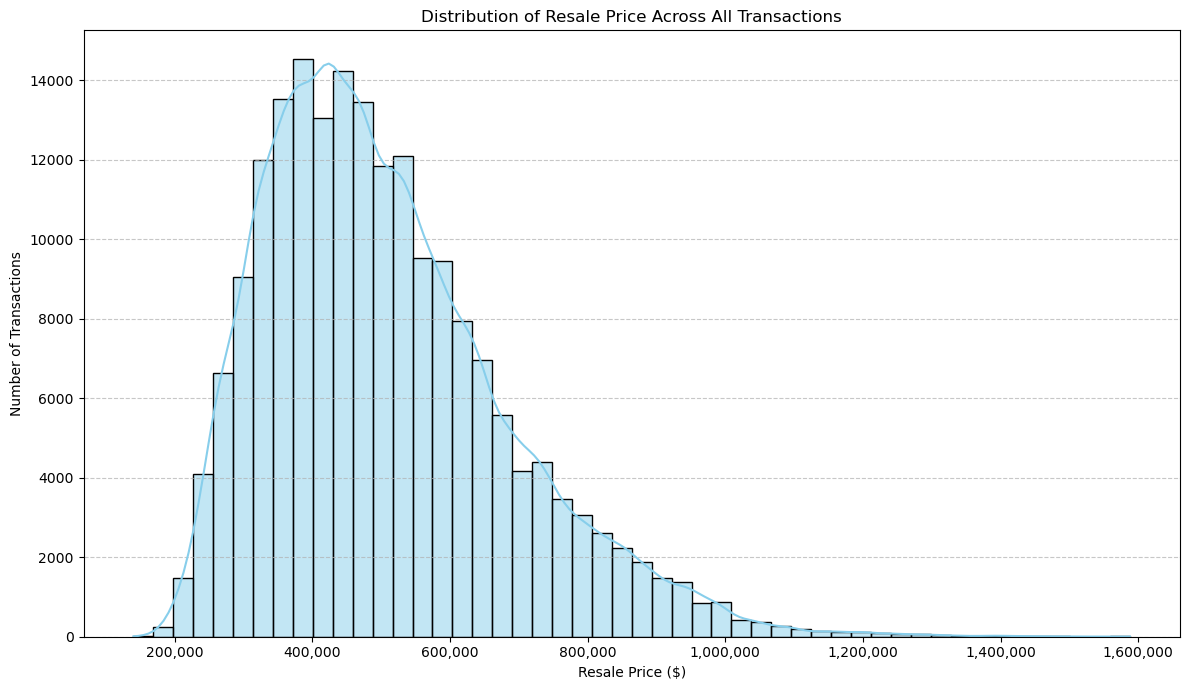

In [28]:
plt.figure(figsize=(12, 7))
sns.histplot(df_upd['resale_price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Price Across All Transactions')
plt.xlabel('Resale Price ($)')
plt.ylabel('Number of Transactions')

# Format x-axis to display readable numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Results from Histogram:
- Right-skewed distribution = Higher no. of transactions at the lower resale price.
- Presence of higher resale price are rarer.
- Median is a better measure as compared to Mean due to outliers

What it means for the HDB Market?
- Most demand falls under the flats that lie within the $400,000 range.


### Number of Transactions Over Time - Is the Demand increasing?

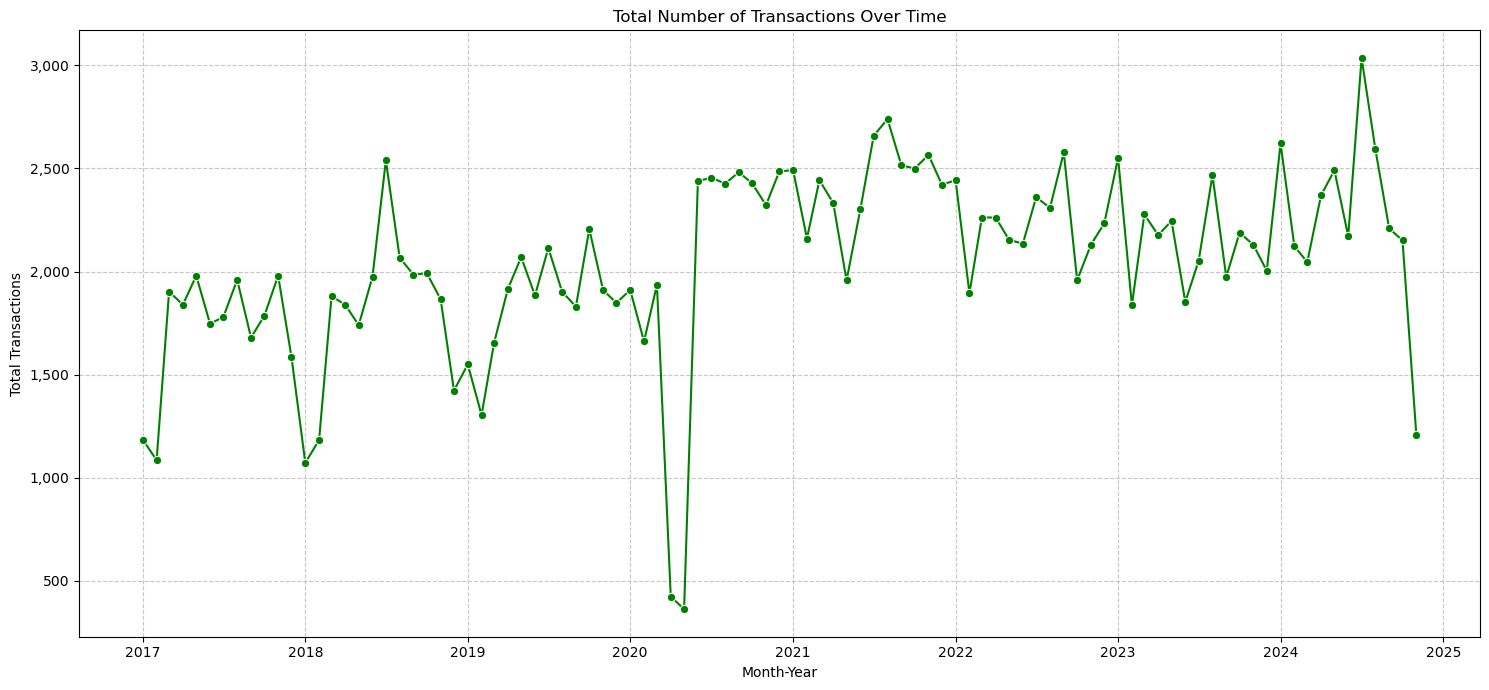

In [29]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Count total transactions per month
transaction_counts = df_upd.groupby('month').size().reset_index(name='total_transactions')

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='total_transactions', data=transaction_counts, marker='o', color='green')

plt.title('Total Number of Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Transactions')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Median Price Analysis
- What is the Median Price Overall
- What is the Median Price per SQM Overall

In [30]:
median_resale_price = df_upd['resale_price'].median()
median_price_per_sqm = df_upd['price_per_sqm'].median()

print(f"Median Resale Price across All Transactions: ${median_resale_price:,.2f}")
print(f"Median Price Per SQM across All Transactions: ${median_price_per_sqm:,.2f}")


Median Resale Price across All Transactions: $475,000.00
Median Price Per SQM across All Transactions: $5,000.00


### Is the HDB Resale Market getting MORE or LESS Affordable?

- Median Per Sqm Price Over-time

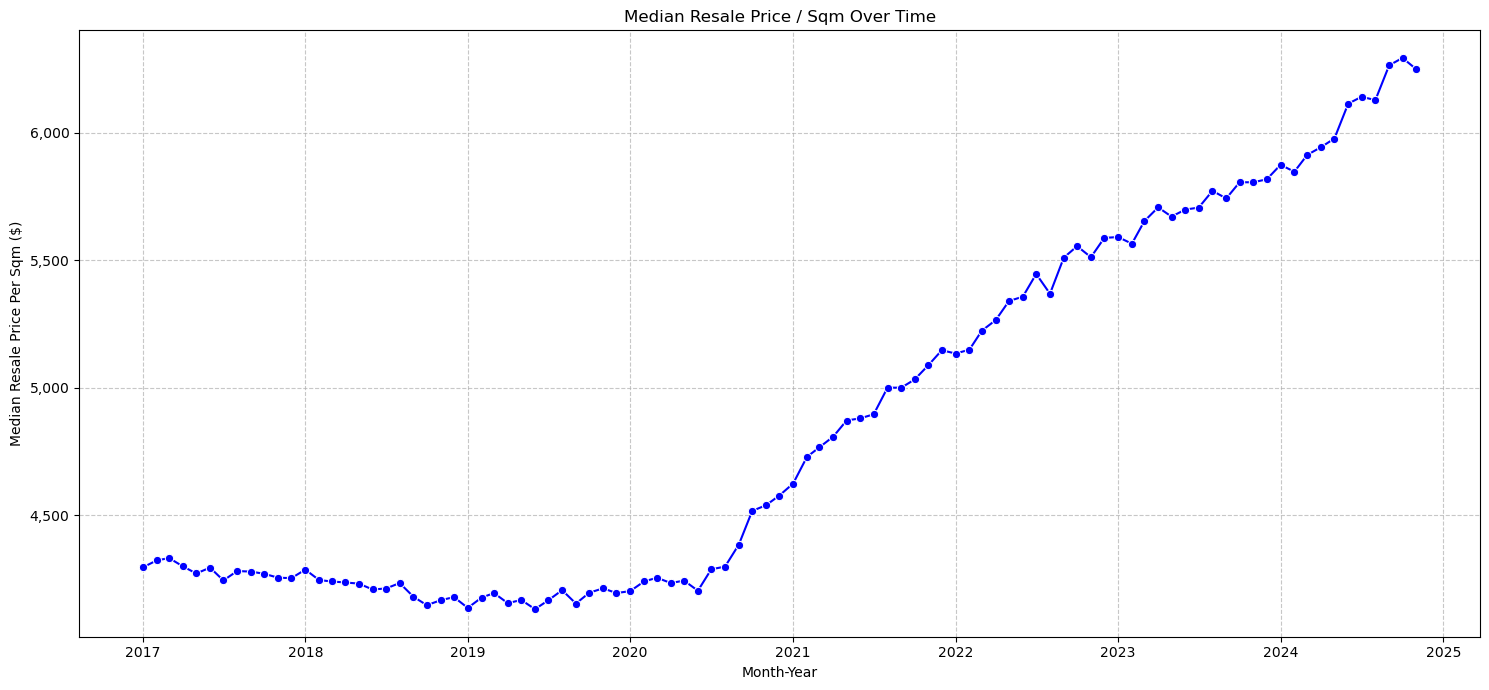

In [31]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median resale price per sqm per month
median_price_per_sqm_over_time = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='price_per_sqm', data=median_price_per_sqm_over_time, marker='o', color='blue')

plt.title('Median Resale Price / Sqm Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate Inflation Rate for Median Per Sqm Price from 2020 onwards

In [32]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Recalculate median price per sqm per month
median_price_per_sqm_overtime = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_per_sqm_yearly = median_price_per_sqm_overtime[
    (median_price_per_sqm_overtime['month'].dt.year >= 2020) &
    (median_price_per_sqm_overtime['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_sqm_price = filtered_median_per_sqm_yearly.set_index('month').resample('YE')['price_per_sqm'].median().reset_index()
yearly_median_sqm_price['year'] = yearly_median_sqm_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_sqm_price['inflation_rate_pps'] = yearly_median_sqm_price['price_per_sqm'].pct_change() * 100

print("Annual Inflation Rate of Median Price Per Sqm (2020-2025):")
display(yearly_median_sqm_price[['year', 'price_per_sqm', 'inflation_rate_pps']].round(2))

Annual Inflation Rate of Median Price Per Sqm (2020-2025):


,year,price_per_sqm,inflation_rate_pps
0,2020,4270.33,NaN
1,2021,4887.65,14.46
2,2022,5363.00,9.73
3,2023,5707.44,6.42
4,2024,6115.11,7.14


Long-term Trend - Compound Annual Growth Rate (CAGR)



In [33]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate yearly median resale price
yearly_median_resale_price_overall = df_upd.groupby(df_upd['month'].dt.year)['resale_price'].median().reset_index()
yearly_median_resale_price_overall.columns = ['year', 'median_resale_price']

# Calculate yearly median price per sqm
yearly_median_price_per_sqm_overall = df_upd.groupby(df_upd['month'].dt.year)['price_per_sqm'].median().reset_index()
yearly_median_price_per_sqm_overall.columns = ['year', 'median_price_per_sqm']

# Define start and end years
start_year = 2017
end_year = yearly_median_resale_price_overall['year'].max() # Get the latest year from the data

# Filter for start and end years
start_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == start_year]['median_resale_price'].iloc[0]
end_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == end_year]['median_resale_price'].iloc[0]

start_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == start_year]['median_price_per_sqm'].iloc[0]
end_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == end_year]['median_price_per_sqm'].iloc[0]

# Calculate number of periods
num_years = end_year - start_year

# Calculate CAGR for Median Resale Price
cagr_resale_price = ((end_price / start_price)**(1/num_years) - 1) * 100

# Calculate CAGR for Median Price Per Sqm
cagr_price_per_sqm = ((end_price_per_sqm / start_price_per_sqm)**(1/num_years) - 1) * 100


print(f"CAGR of Median Price Per Sqm ({start_year}-{end_year}): {cagr_price_per_sqm:.2f}%")

CAGR of Median Price Per Sqm (2017-2024): 5.11%


### Findings:
- Overall Median Prices over time show an upward trend from 2020 onwards
- However, since 2020, Price Inflation has been showing decreasing trends
- CAGR of Median Prices are around 5%, meaning as of the 2020, the Inflation Rate is still increasing at a greater rate than the CAGR --> **Indicative of Housing becoming Less Affordable.**


## STEP 3.2: ANALYSIS OF STRUCTURAL DRIVERS AND RESALE PRICES
- 1) Median Resale Price / Sqm VS Flat Type
- 2) Median Resale Price / Sqm VS Floor Area
- 3) Median Resale Price VS Remaining Lease Years
- 4) Heatmap of Median Resale Price / Sqm VS Flat Type + Story Range
- 5) Median Resale Price / Sqm VS Flat Age


/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_96466/260518832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_type', y='price_per_sqm', data=df_upd, palette='Set2', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])


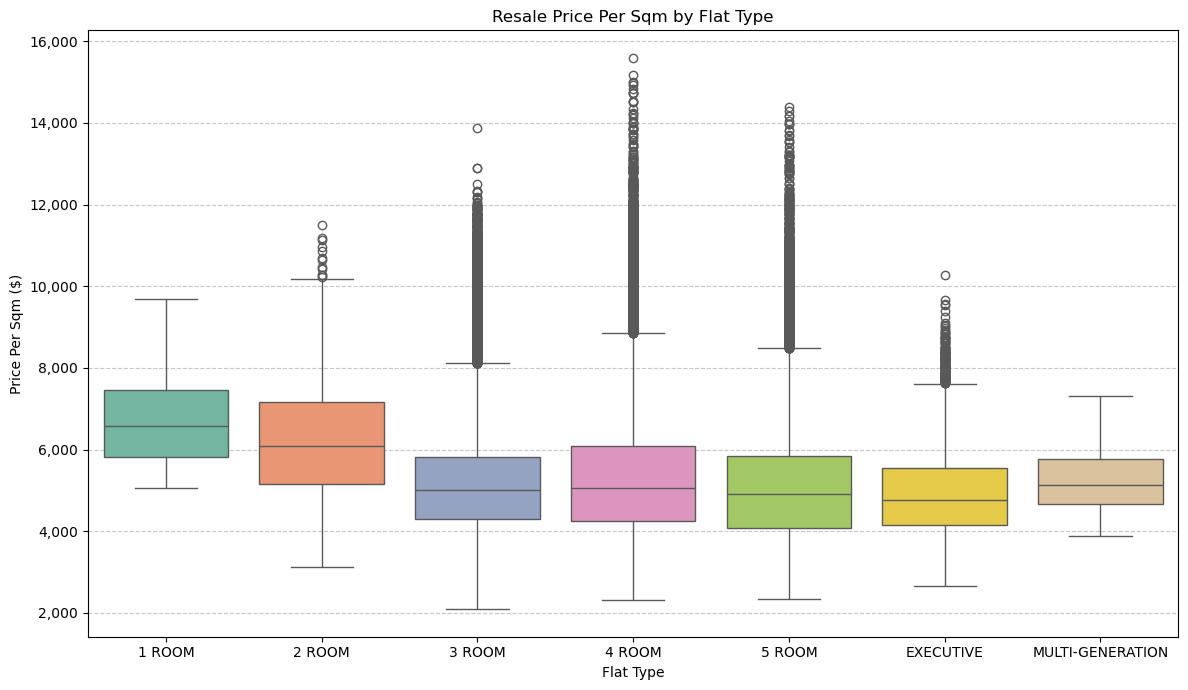

In [73]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='flat_type', y='price_per_sqm', data=df_upd, palette='Set2', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'])
plt.title('Resale Price Per Sqm by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_96466/3947623435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floor_area_category', y='price_per_sqm', data=df_upd, palette='Set2')


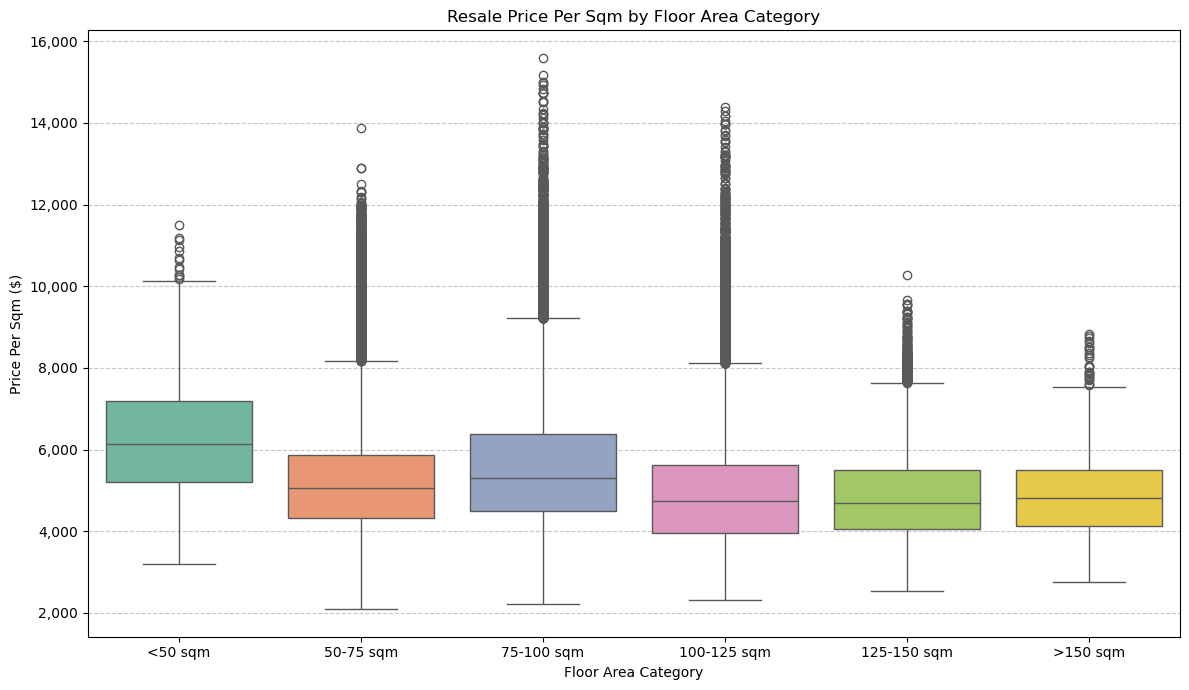

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='floor_area_category', y='price_per_sqm', data=df_upd, palette='Set2')
plt.title('Resale Price Per Sqm by Floor Area Category')
plt.xlabel('Floor Area Category')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Note: you may need to restart the kernel to use updated packages.


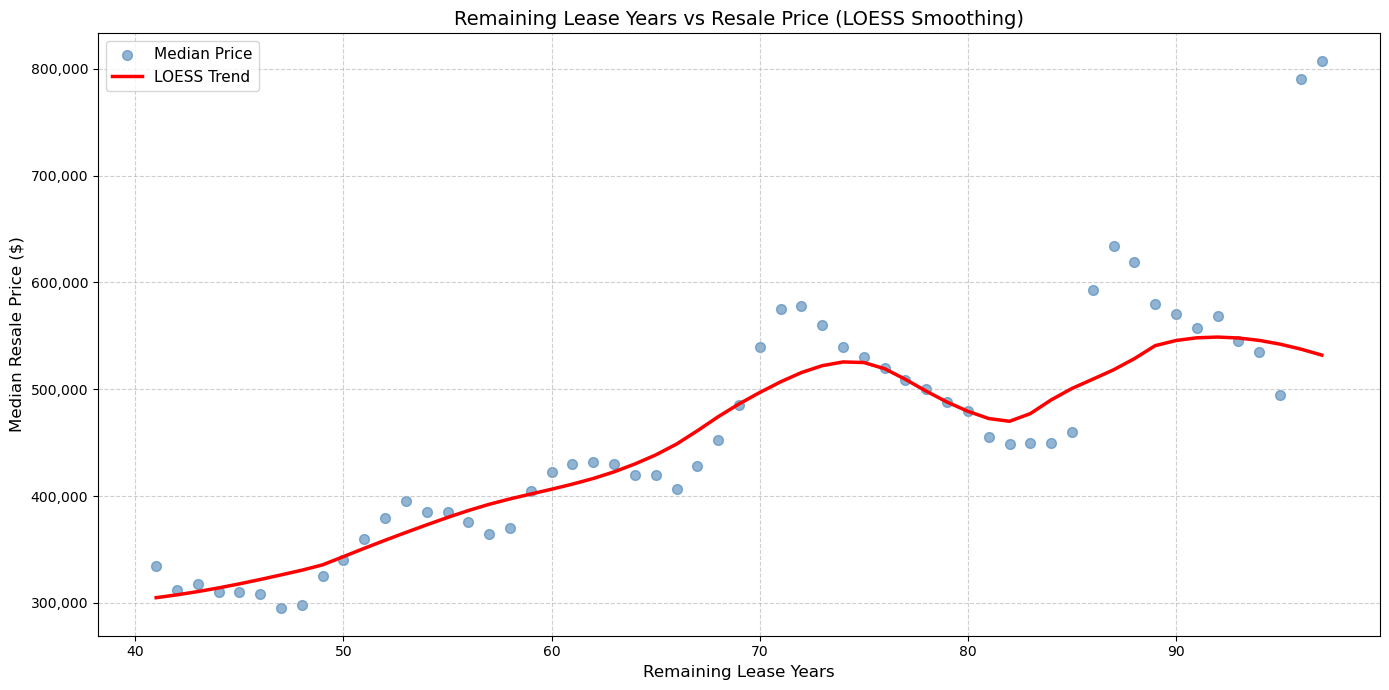

In [62]:
%pip install statsmodels
from statsmodels.nonparametric.smoothers_lowess import lowess

# Prepare data: group by remaining_lease_years and get median resale_price
lease_price_data = df_upd.groupby('remaining_lease_years')['resale_price'].median().reset_index()

# Create scatter plot with LOESS smooth curve
plt.figure(figsize=(14, 7))

# Scatter plot
plt.scatter(lease_price_data['remaining_lease_years'], lease_price_data['resale_price'], 
            alpha=0.6, s=50, color='steelblue', label='Median Price')

# LOESS smoothing
loess_result = lowess(lease_price_data['resale_price'], lease_price_data['remaining_lease_years'], frac=0.3)
plt.plot(loess_result[:, 0], loess_result[:, 1], color='red', linewidth=2.5, label='LOESS Trend')

plt.title('Remaining Lease Years vs Resale Price (LOESS Smoothing)', fontsize=14)
plt.xlabel('Remaining Lease Years', fontsize=12)
plt.ylabel('Median Resale Price ($)', fontsize=12)

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

Findings:


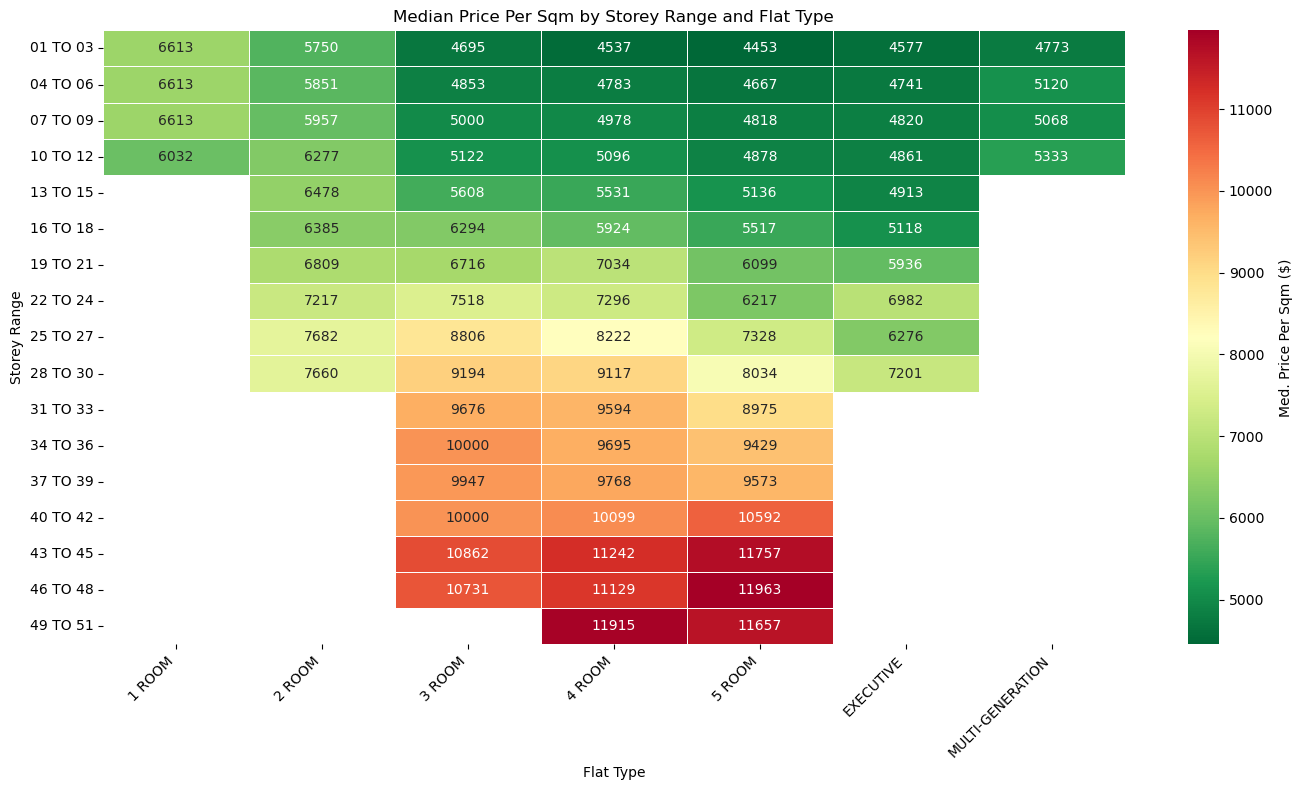

In [75]:
# Calculate median price_per_sqm for each storey_range and flat_type combination
storey_flat_type_pivot = df_upd.groupby(['storey_range', 'flat_type'])['price_per_sqm'].median().unstack()


plt.figure(figsize=(14, 8))
sns.heatmap(storey_flat_type_pivot, annot=True, fmt=".0f", cmap="RdYlGn_r", linewidths=.5, cbar_kws={'label': 'Med. Price Per Sqm ($)'})
plt.title('Median Price Per Sqm by Storey Range and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Storey Range')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

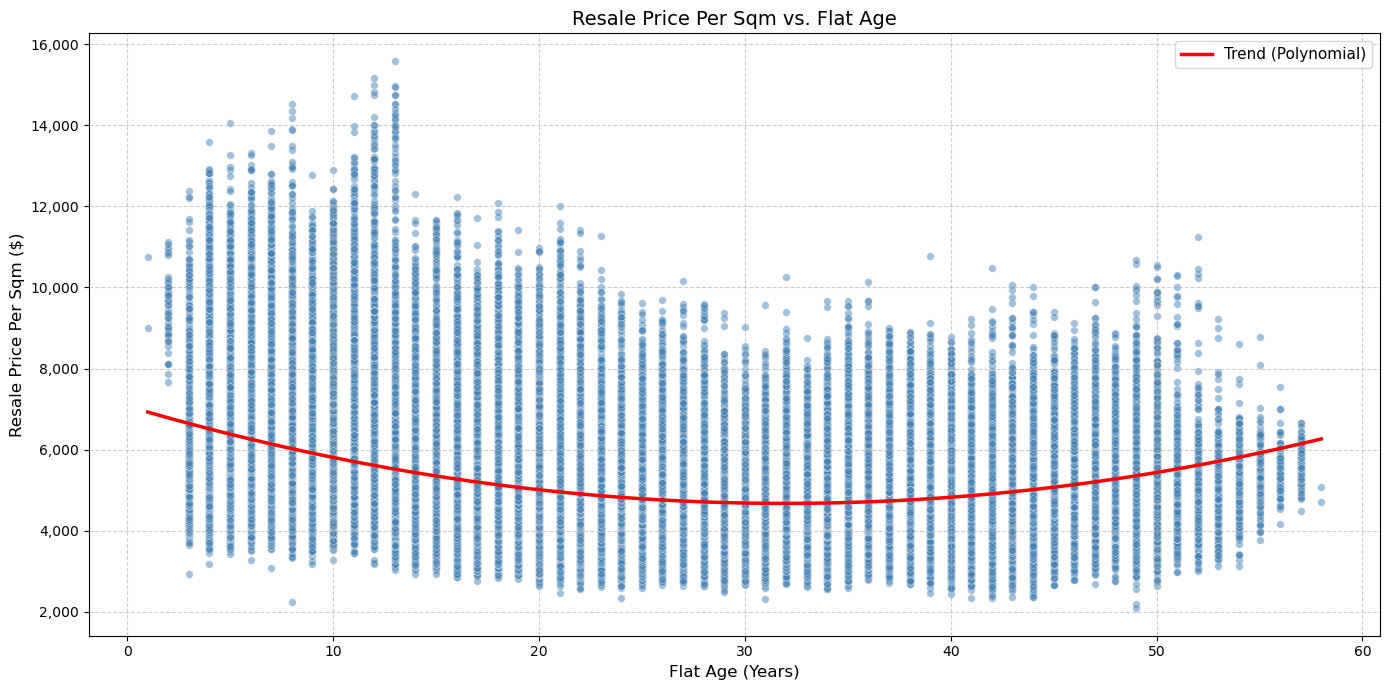

In [64]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='flat_age', y='price_per_sqm', data=df_upd, alpha=0.5, s=30, color='steelblue')

# Add a trend line
z = np.polyfit(df_upd['flat_age'], df_upd['price_per_sqm'], 2)
p = np.poly1d(z)
x_trend = np.linspace(df_upd['flat_age'].min(), df_upd['flat_age'].max(), 100)
plt.plot(x_trend, p(x_trend), color='red', linewidth=2.5, label='Trend (Polynomial)')

plt.title('Resale Price Per Sqm vs. Flat Age', fontsize=14)
plt.xlabel('Flat Age (Years)', fontsize=12)
plt.ylabel('Resale Price Per Sqm ($)', fontsize=12)

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

### What are people buying?
- What _______ is most transacted?
  1. Flat Type
  2. Flat Size
  3. Flat Model

  

Flat Type Distribution

Number of flats per flat_type:


flat_type
4 ROOM              81967
5 ROOM              48091
3 ROOM              46071
EXECUTIVE           14301
2 ROOM               3586
MULTI-GENERATION       80
1 ROOM                 74
Name: count, dtype: int64

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_96466/2508281703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)


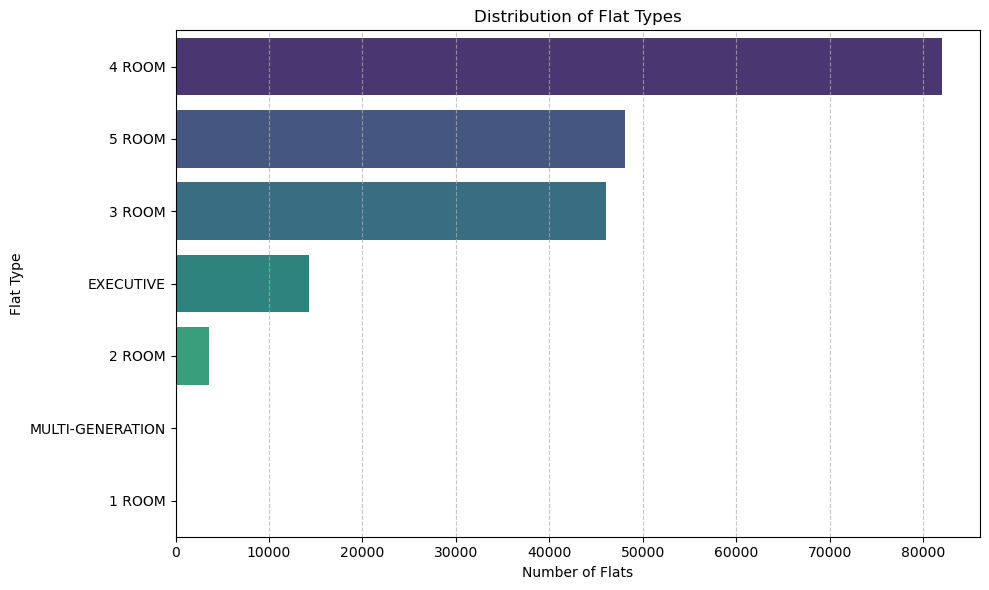

In [50]:
print("Number of flats per flat_type:")
display(df_upd['flat_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Types')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Findings:
- Most Popular Flat Types:
  1. 4 Room (81967)
  2. 5 Room (48091)
  3. 3 Room (46071)
  4. Exec (14301)

- Most Popular Flat Size (floor_area_sqm):
  1. 93 (15507)
  2. 92 (12225)
  3. 67 (11834)
  4. 110 (8907)

> This is overall is indicative of the Supply and Demand in the Housing Market

#### How does Flat Type / Flat Model affect Pricing?

Median Resale Price Per Sqm Over Time by Flat Type
- Informs us on price trends specific to flat type over the years
- Which flat types are becoming more / less affordable

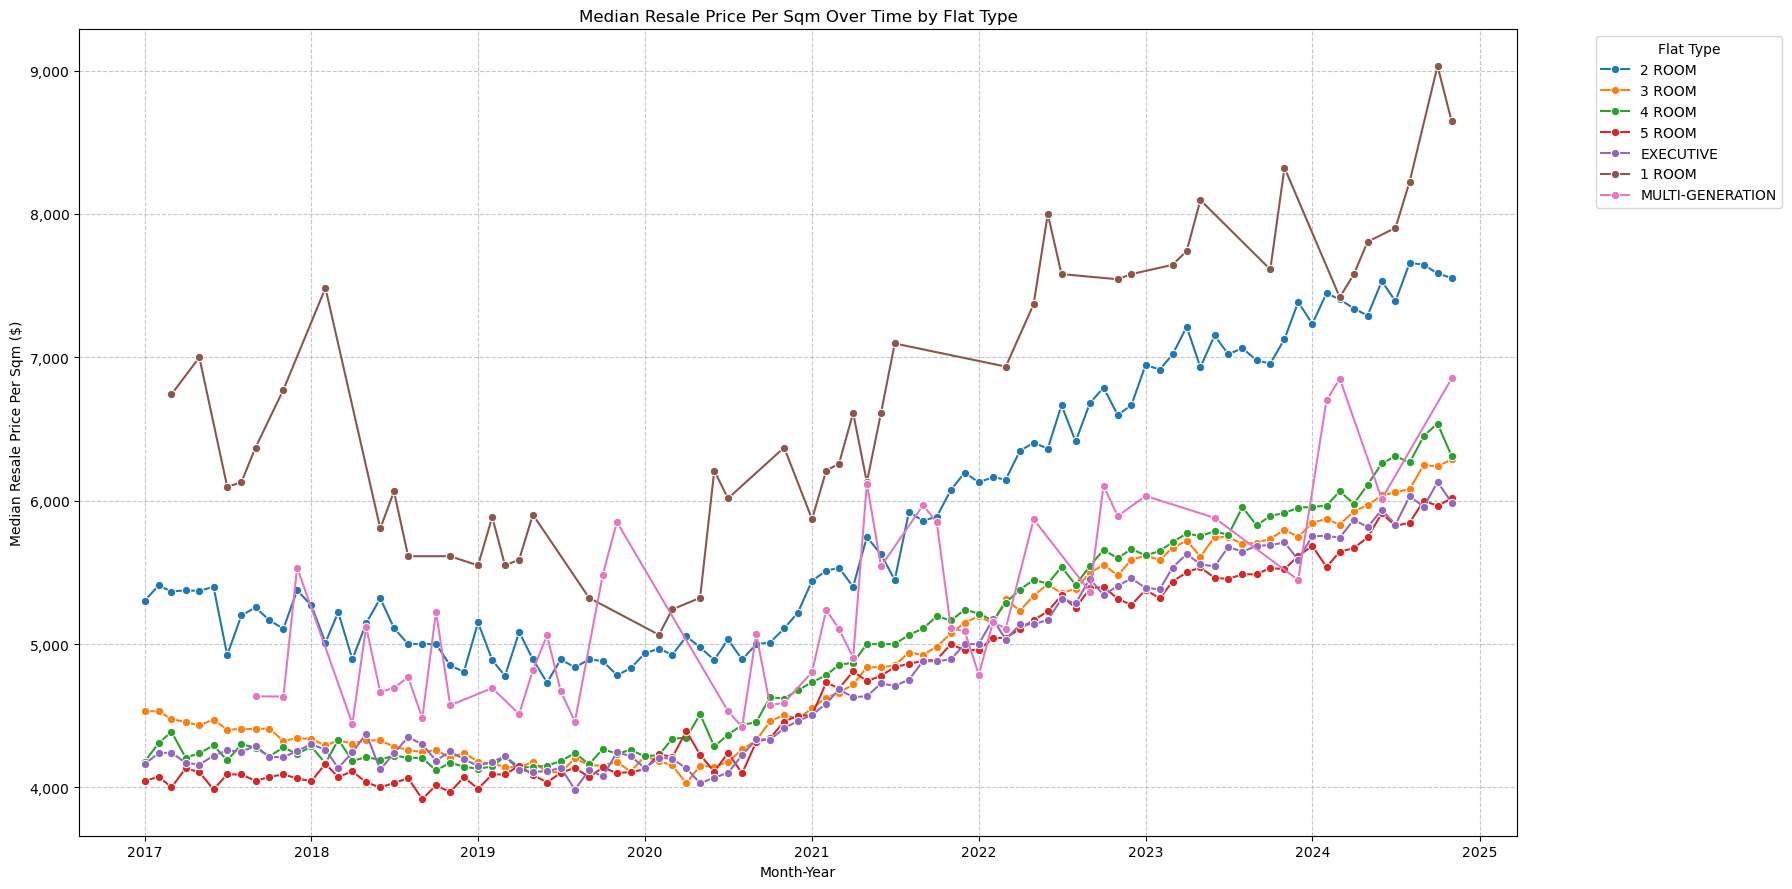

In [51]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median price_per_sqm per month for each flat_type
median_price_per_sqm_by_flat_type_over_time = df_upd.groupby(['month', 'flat_type'])['price_per_sqm'].median().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(x='month', y='price_per_sqm', hue='flat_type', data=median_price_per_sqm_by_flat_type_over_time, marker='o', palette='tab10')

plt.title('Median Resale Price Per Sqm Over Time by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

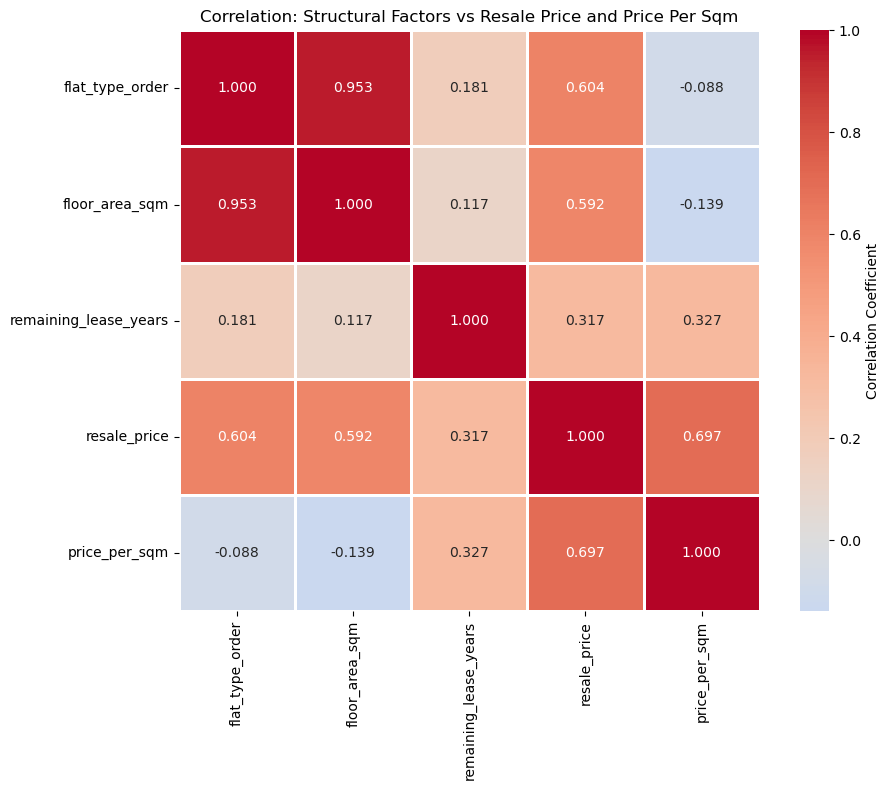

In [68]:
# Calculate correlation matrix for structural factors and pricing
structural_factors = ['flat_type_order', 'floor_area_sqm', 'remaining_lease_years', 'resale_price', 'price_per_sqm']
correlation_matrix = df_upd[structural_factors].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation: Structural Factors vs Resale Price and Price Per Sqm')
plt.tight_layout()
plt.show()

/var/folders/2w/z7_24rf9307gh7smq49n57mw0000gn/T/ipykernel_96466/870506220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_model', y='price_per_sqm', data=df_upd, palette='Set2')


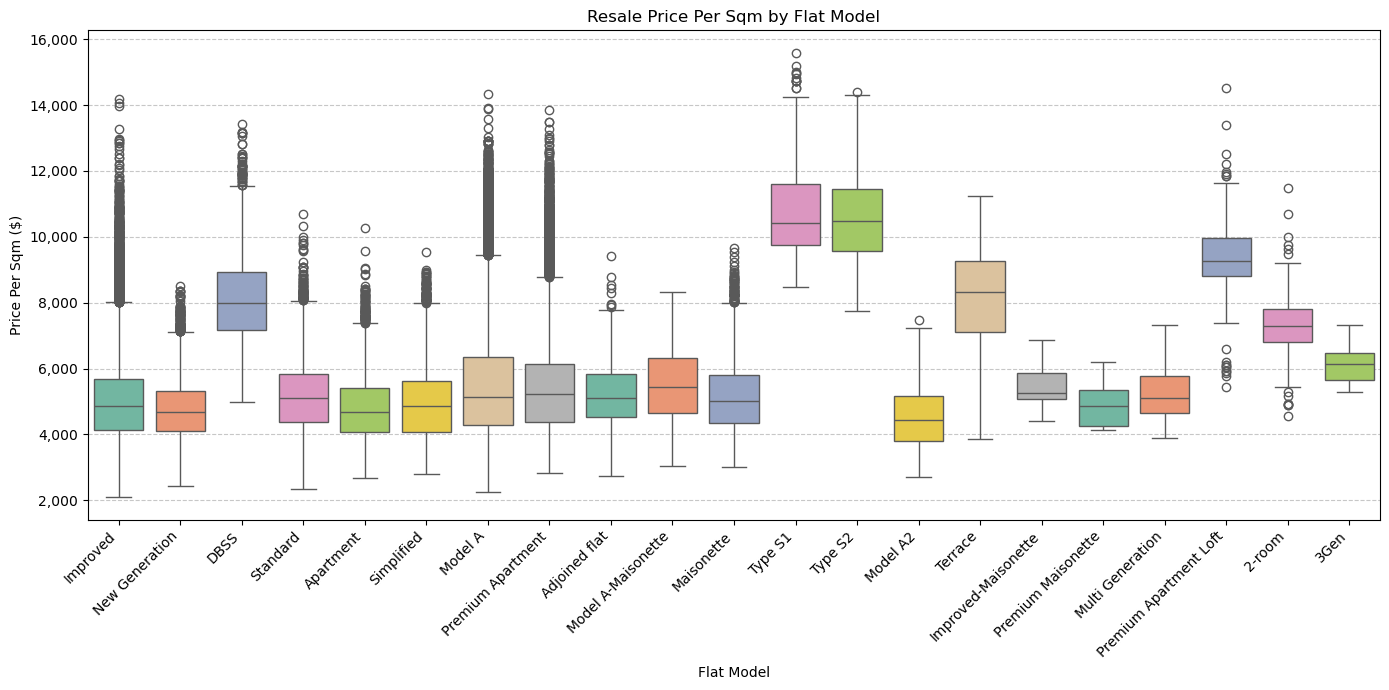

In [69]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='flat_model', y='price_per_sqm', data=df_upd, palette='Set2')
plt.title('Resale Price Per Sqm by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## STEP 3.3 TEMPORAL DRIVERS
- Understanding Temporal Factors, and how it affects the Housing Market
>* Flat Age
>* Location

Let's take a look at Flat Age (Remaining Lease)

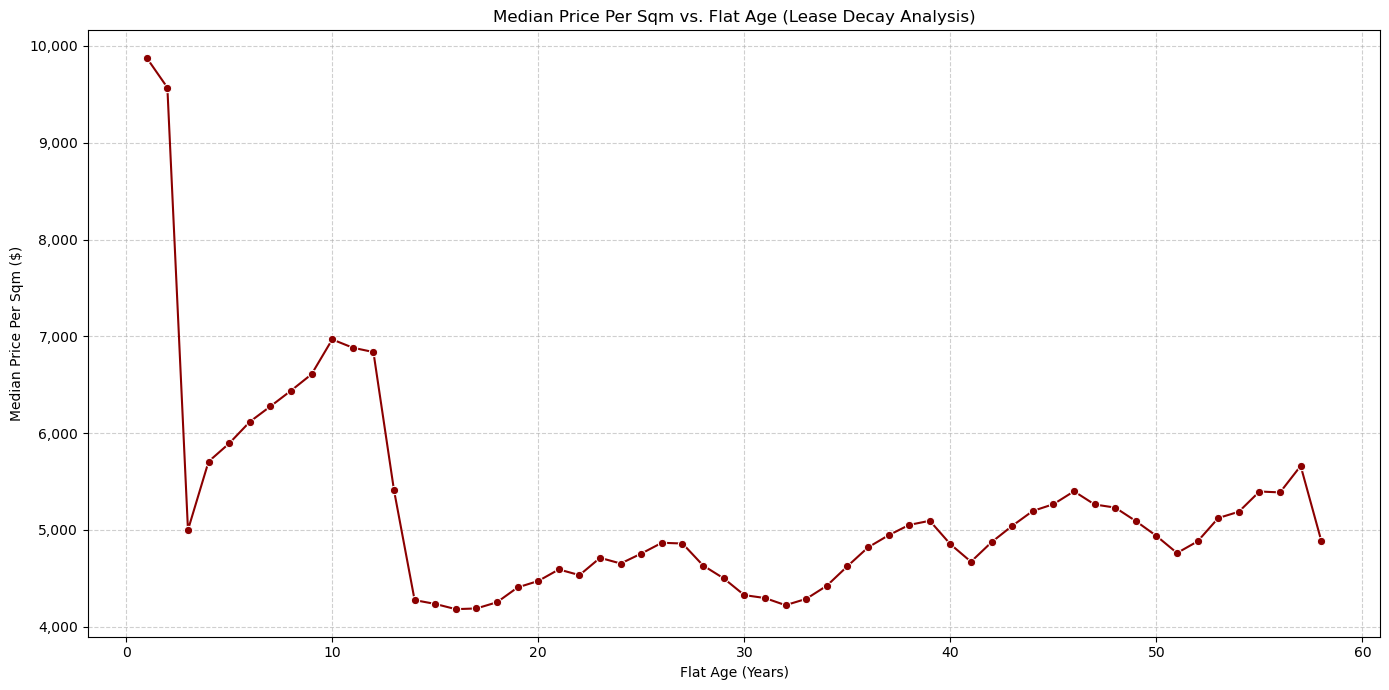

In [36]:
# Calculate median price_per_sqm for each remaining_lease_years
lease_decay_data = df_upd.groupby('flat_age')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='flat_age', y='price_per_sqm', data=lease_decay_data, marker='o', color='darkred')

plt.title('Median Price Per Sqm vs. Flat Age (Lease Decay Analysis)')
plt.xlabel('Flat Age (Years)')
plt.ylabel('Median Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Comments: Add in percentage / 10 year decrease in remaining lease years

Analysing the relationship between Locational/Temporal Factors and Resale Price

In [37]:
unique_towns = df_upd['town'].unique()
print("Unique Towns:")
for town in unique_towns:
    print(town)

Unique Towns:
ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


Price Per Sqm Distribution by Town
- Informs us on affordability per town

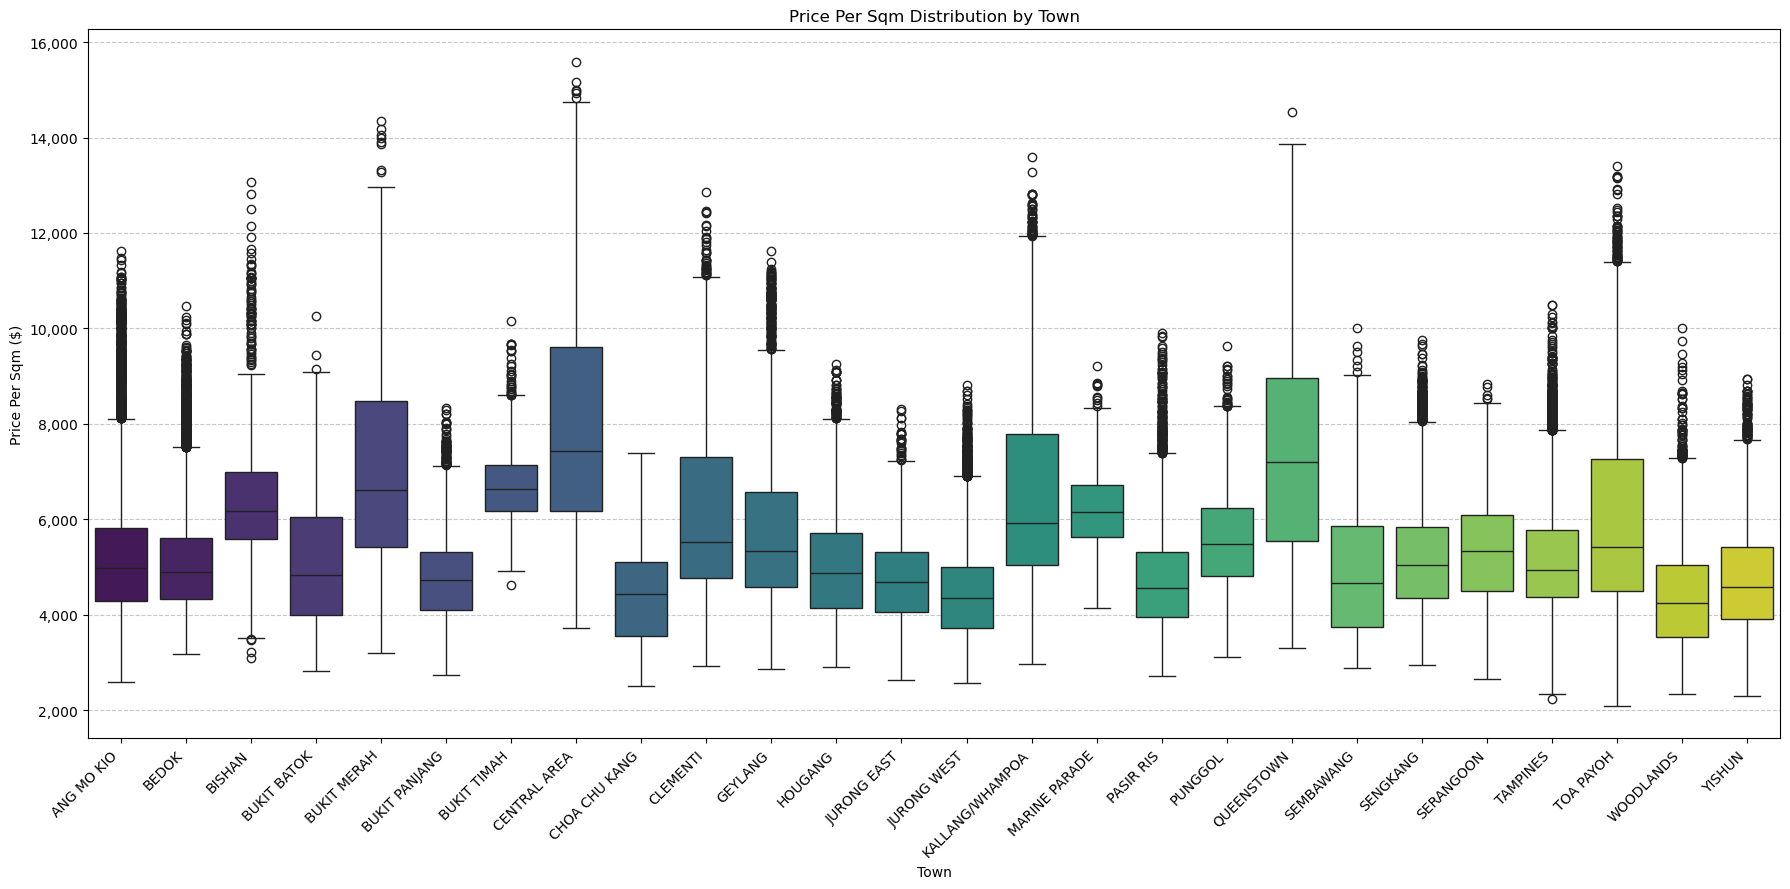

In [38]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='price_per_sqm', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Price Per Sqm Distribution by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribution of Flat Age by Town
- Tells us the supply of older/younger flats in each town
- Informs us on Housing Stock

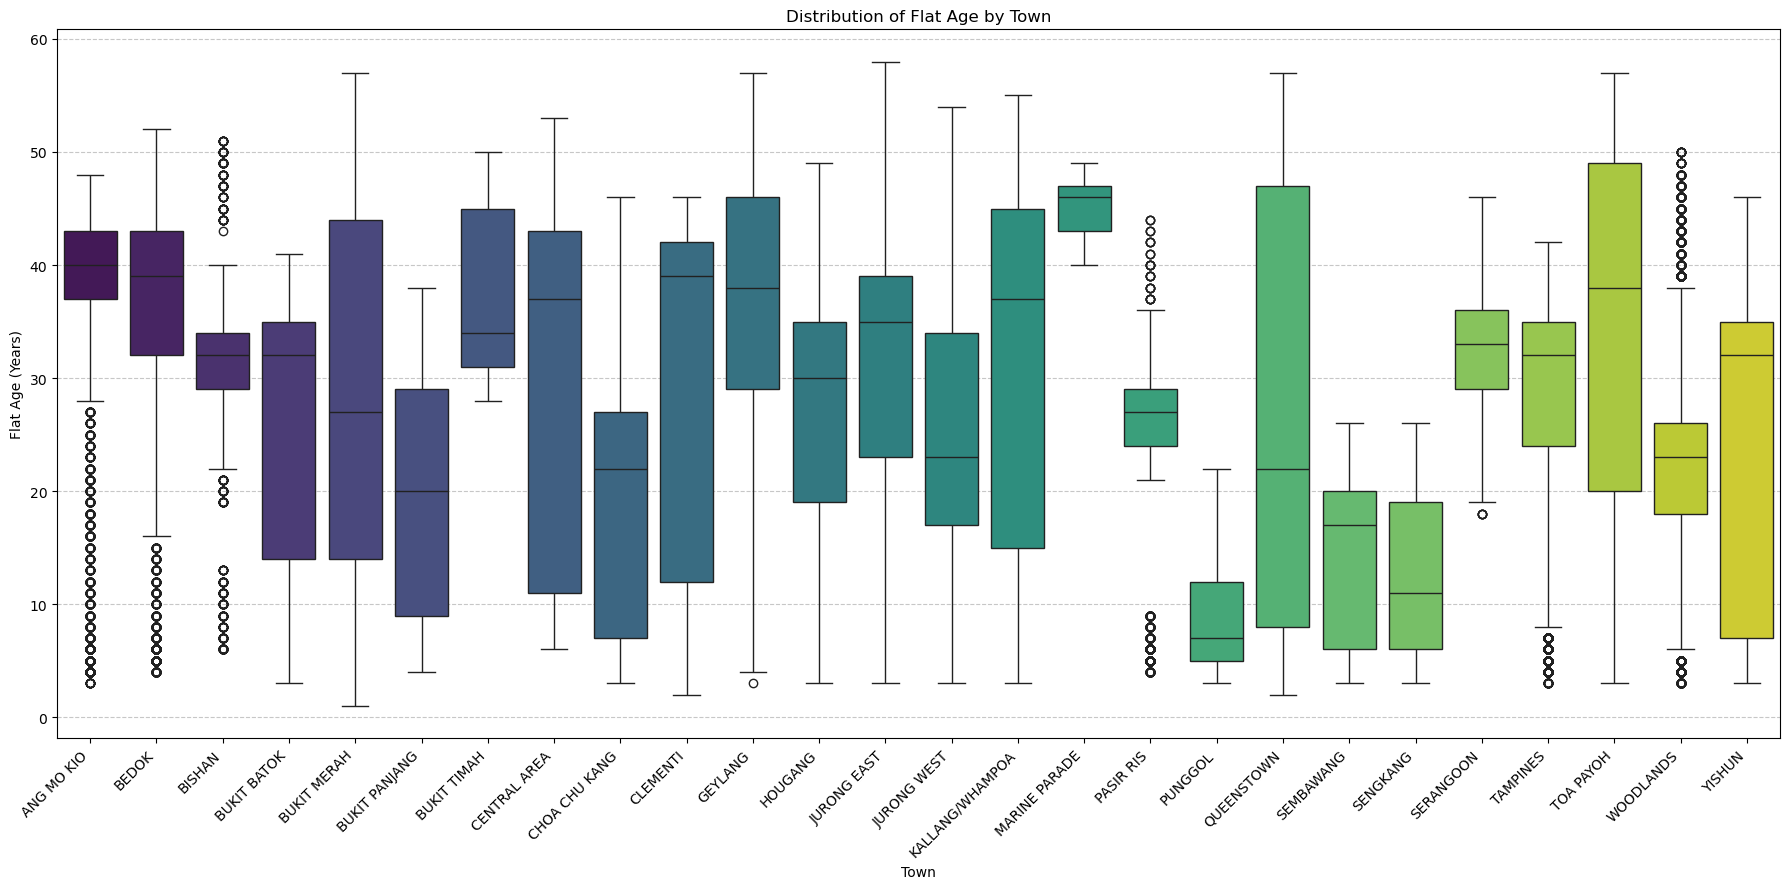

In [39]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='flat_age', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Distribution of Flat Age by Town')
plt.xlabel('Town')
plt.ylabel('Flat Age (Years)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Heat Map of Town x Flat Type

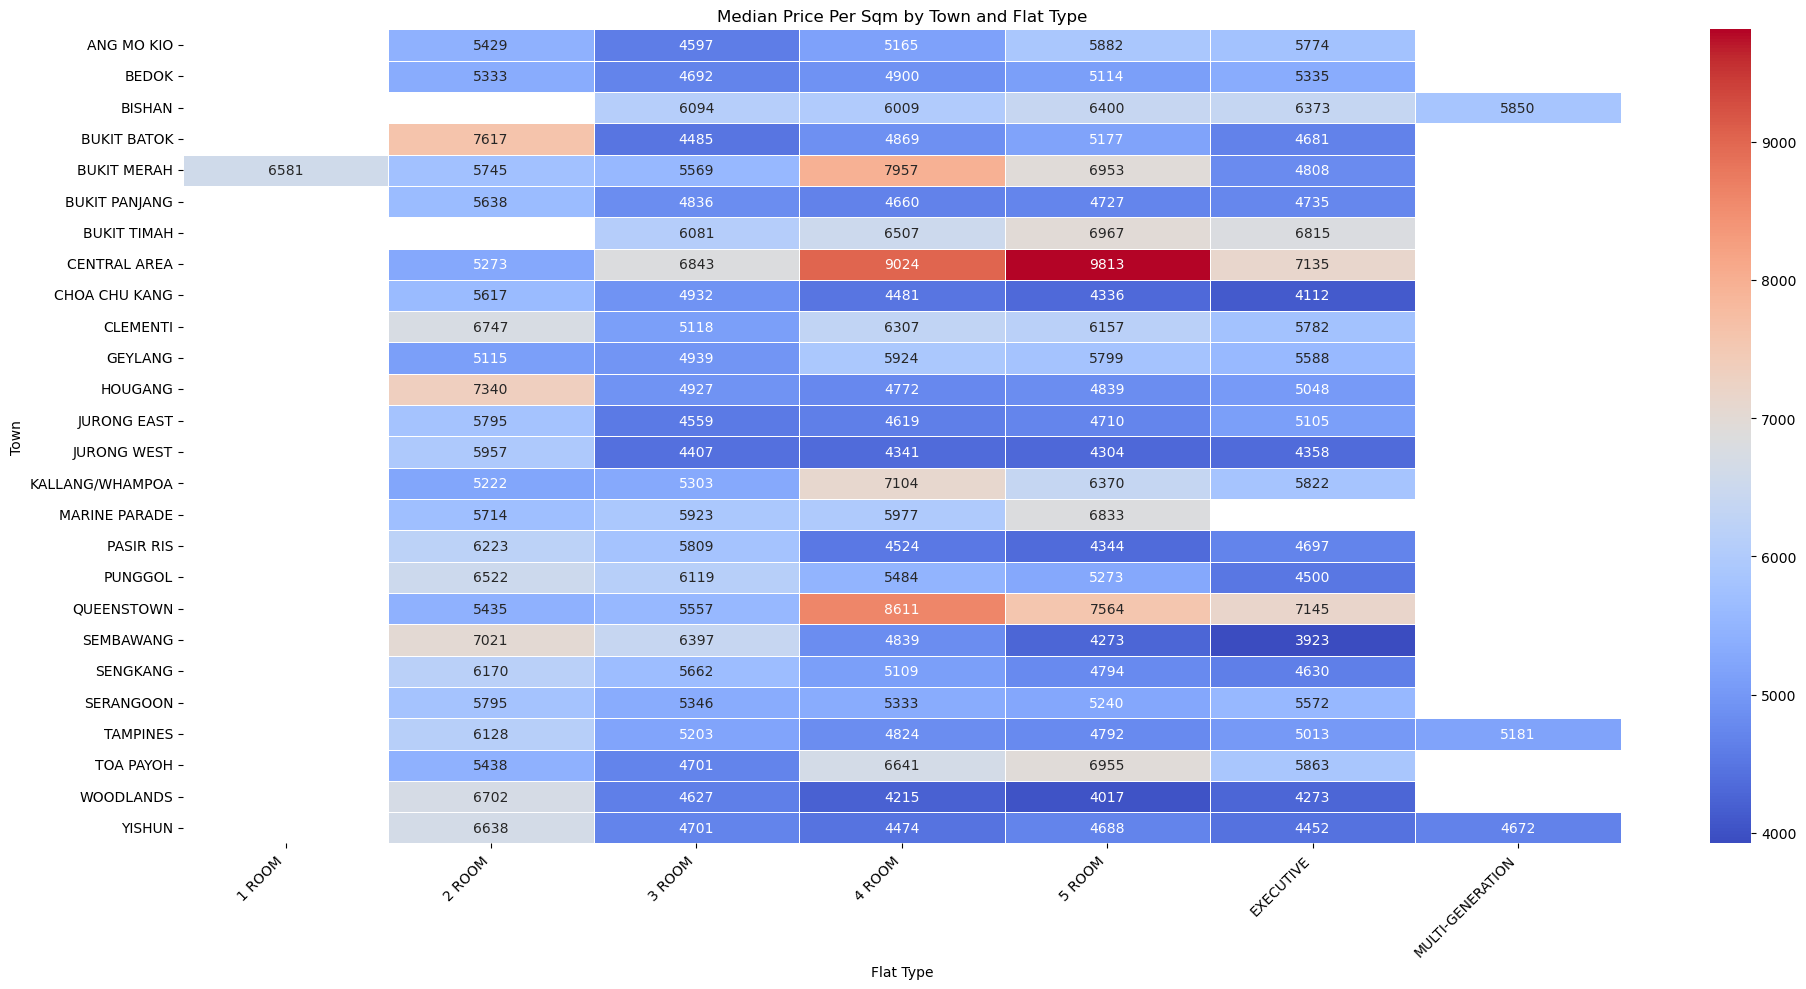

In [40]:
# Calculate median price_per_sqm for each town and flat_type
median_price_per_sqm_pivot = df_upd.groupby(['town', 'flat_type'])['price_per_sqm'].median().unstack()

plt.figure(figsize=(20, 10)) # Adjust figure size for readability
sns.heatmap(median_price_per_sqm_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Median Price Per Sqm by Town and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## STEP 4: PREPPING DATA FOR MODELLING
- Clean and Encode
- Add Essential Features
- Drop Unneccesary Features
- Check multicollinarity
- Check correlation
- Select Features for Modelling


## 4.1 Clean and Encode Data
- Categorical data into Numerical data - such as Town, Flat Type, Flat_Model , etc.

In [41]:
df_upd.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


Adding in Contextual Stats Encoding
- by Town and by Flat Type


In [42]:
# Town-level Stats
# Calculate town-level statistics directly using the 'town' column
town_stats = (
    df_upd.groupby('town')
          .agg(
              town_median_psqm = ('price_per_sqm', 'median'),
              town_mean_psqm   = ('price_per_sqm', 'mean'),
              town_avg_lease   = ('remaining_lease_years', 'mean'),
              town_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'town' column
df_upd = df_upd.merge(town_stats, on='town', how='left')

In [43]:
print("DataFrame after adding town-level statistics:")
display(df_upd.sample(5))

DataFrame after adding town-level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count
29616,2018-06-01,SENGKANG,4 ROOM,223A,COMPASSVALE WALK,01 TO 03,102.0,Model A,1999,398000.0,3901.960784,2018,19,79.0,5038.461538,5161.965552,86.194658,16023
128604,2022-06-01,JURONG WEST,4 ROOM,744,JURONG WEST ST 73,07 TO 09,112.0,Model A,1993,450000.0,4017.857143,2022,29,70.0,4360.902256,4445.133913,73.784109,12863
92721,2021-03-01,BUKIT PANJANG,4 ROOM,548A,SEGAR RD,13 TO 15,92.0,Model A,2015,463000.0,5032.608696,2021,6,93.0,4722.222222,4760.009224,79.088980,7069
118620,2022-01-01,TAMPINES,4 ROOM,140,TAMPINES ST 12,04 TO 06,91.0,New Generation,1984,450000.0,4945.054945,2022,38,61.0,4931.506849,5190.587612,70.777051,12994
89384,2021-01-01,SENGKANG,5 ROOM,259A,COMPASSVALE RD,04 TO 06,110.0,Improved,2001,455000.0,4136.363636,2021,20,79.0,5038.461538,5161.965552,86.194658,16023


In [48]:
# Flat_type-level Stats
# Calculate flat-type-level statistics directly using the 'flat_type' column
flat_type_stats = (
    df_upd.groupby('flat_type')
          .agg(
              flat_type_median_psqm = ('price_per_sqm', 'median'),
              flat_type_mean_psqm   = ('price_per_sqm', 'mean'),
              flat_type_avg_lease   = ('remaining_lease_years', 'mean'),
              flat_type_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'flat_type' column
df_upd = df_upd.merge(flat_type_stats, on='flat_type', how='left')

In [49]:
print("DataFrame after adding flat-type level statistics:")
display(df_upd.sample(15
                    ))

DataFrame after adding flat-type level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count
22765,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979.0,210000.0,...,39.0,60.0,4363.636364,4719.628345,64.661328,2997,5000.000000,5096.835187,75.616975,919
48059,2019-04-01,TAMPINES,4 ROOM,498D,TAMPINES ST 45,01 TO 03,106.0,Premium Apartment,1997.0,420000.0,...,22.0,77.0,4380.165289,4516.663376,71.396324,4080,4219.047619,4559.275996,77.535582,26685
35151,2018-09-01,BUKIT MERAH,3 ROOM,58,HAVELOCK RD,07 TO 09,69.0,Model A,2013.0,548000.0,...,5.0,93.0,6055.555556,6373.965436,71.490902,2583,4298.507463,4514.269312,64.500893,15678
7873,2017-05-01,YISHUN,3 ROOM,111,YISHUN RING RD,01 TO 03,67.0,New Generation,1982.0,270000.0,...,35.0,64.0,3823.529412,3901.256787,73.318024,4333,4298.507463,4514.269312,64.500893,15678
22756,2018-02-01,YISHUN,EXECUTIVE,387,YISHUN RING RD,10 TO 12,146.0,Maisonette,1988.0,550000.0,...,30.0,69.0,3823.529412,3901.256787,73.318024,4333,4214.765101,4331.622614,74.131157,5177
16073,2017-10-01,KALLANG/WHAMPOA,4 ROOM,94,WHAMPOA DR,04 TO 06,91.0,Improved,1974.0,340000.0,...,43.0,55.0,5294.117647,5604.472396,67.088159,1917,4219.047619,4559.275996,77.535582,26685
46142,2019-03-01,SERANGOON,3 ROOM,243,SERANGOON AVE 2,04 TO 06,64.0,Simplified,1985.0,335000.0,...,34.0,65.0,4630.872483,4791.375206,68.645818,1327,4298.507463,4514.269312,64.500893,15678
4597,2017-04-01,BUKIT PANJANG,5 ROOM,111,GANGSA RD,07 TO 09,132.0,Improved,1987.0,470000.0,...,30.0,69.0,4035.319786,4125.453614,79.831376,2384,4070.796460,4486.106530,77.549000,15949
5102,2017-04-01,KALLANG/WHAMPOA,4 ROOM,120,MCNAIR RD,07 TO 09,84.0,Simplified,1987.0,470000.0,...,30.0,69.0,5294.117647,5604.472396,67.088159,1917,4219.047619,4559.275996,77.535582,26685
53753,2019-07-01,QUEENSTOWN,4 ROOM,53,C'WEALTH DR,16 TO 18,96.0,Model A,2015.0,848000.0,...,4.0,94.0,6540.952381,6545.706041,70.552893,1711,4219.047619,4559.275996,77.535582,26685


Clean-up Numerical Values
- Storey Range (take average)

In [50]:
def convert_storey_range_to_avg(storey_range_str):
    if pd.isna(storey_range_str):
        return np.nan
    parts = storey_range_str.split(' TO ')
    if len(parts) == 2:
        try:
            lower = int(parts[0])
            upper = int(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where conversion to int fails
    return np.nan # Handle unexpected formats

# Apply the conversion function to create a new 'storey_avg' column
df_upd['storey_avg'] = df_upd['storey_range'].apply(convert_storey_range_to_avg)

# Display a sample of the updated DataFrame with the new 'storey_avg' column
print("DataFrame after converting 'storey_range' to 'storey_avg':")
display(df_upd[['storey_range', 'storey_avg']].sample(10))

DataFrame after converting 'storey_range' to 'storey_avg':


,storey_range,storey_avg
19916,07 TO 09,8.0
40732,01 TO 03,2.0
1140,04 TO 06,5.0
39019,04 TO 06,5.0
8847,04 TO 06,5.0
17285,28 TO 30,29.0
53660,10 TO 12,11.0
46246,10 TO 12,11.0
48357,07 TO 09,8.0
46424,01 TO 03,2.0


### Load All Numerical Columns

In [51]:
numerical_cols_upd = df_upd.select_dtypes(include=np.number).columns
print("Numerical Columns:")
for col in numerical_cols_upd:
    print(col)

Numerical Columns:
floor_area_sqm
lease_commence_date
resale_price
price_per_sqm
trans_year
flat_age
remaining_lease_years
town_median_psqm
town_mean_psqm
town_avg_lease
town_count
flat_type_median_psqm
flat_type_mean_psqm
flat_type_avg_lease
flat_type_count
storey_avg


Check for Missing Values (in Numerical Columns)

In [52]:
print("Missing values in numerical columns:")
print(df_upd[numerical_cols_upd].isnull().sum())

Missing values in numerical columns:
floor_area_sqm           1
lease_commence_date      1
resale_price             1
price_per_sqm            1
trans_year               0
flat_age                 1
remaining_lease_years    1
town_median_psqm         0
town_mean_psqm           0
town_avg_lease           0
town_count               0
flat_type_median_psqm    0
flat_type_mean_psqm      0
flat_type_avg_lease      0
flat_type_count          0
storey_avg               1
dtype: int64


### Round All Values to 4 d.p.

In [53]:
# Identify numerical columns
numerical_cols = df_upd.select_dtypes(include=np.number).columns

# Round all numerical columns to 4 decimal places
df_upd[numerical_cols] = df_upd[numerical_cols].round(4)

print("DataFrame after rounding all numerical values to 4 decimal places:")
display(df_upd.head())

DataFrame after rounding all numerical values to 4 decimal places:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count,storey_avg
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,232000.0,...,61.0,4363.6364,4719.6283,64.6613,2997,5000.0000,5096.8352,75.6170,919,11.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,250000.0,...,60.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,15678,2.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,262000.0,...,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,15678,2.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,265000.0,...,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,15678,5.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,265000.0,...,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,15678,2.0


### Check for Correlation
- Highly correlated features break regression.

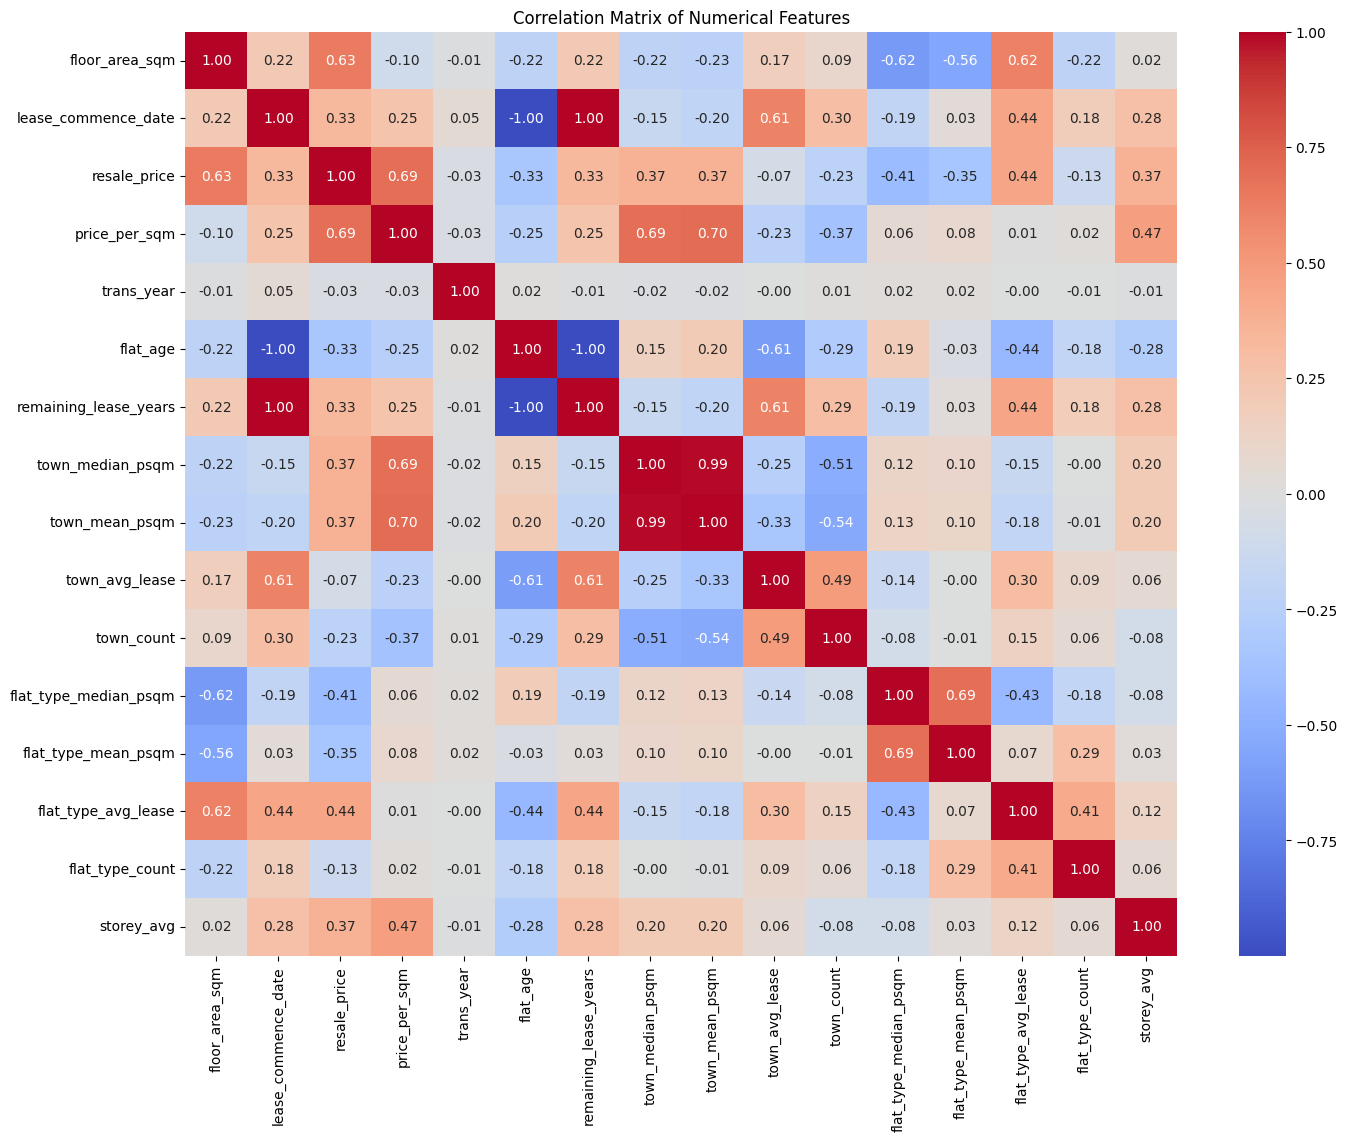

In [54]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_upd.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Findings:
- Consider dropping: lease_commence_date VS remaining_lease_years VS flat_age
- AND mean values (due to right-skewed data, mean values are not reliable)

### One Hot Encoding for Town and Flat_Type

In [55]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_town = encoder.fit_transform(df_upd[['town']])
encoded_town_df = pd.DataFrame(encoded_town, columns=encoder.get_feature_names_out(['town']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_town_df], axis=1)
df_upd = df_upd.drop('town', axis=1)

In [56]:
display(df_upd.sample(10))

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
11869,2017-08-01,4 ROOM,40,BEO CRES,10 TO 12,118.0,Adjoined flat,1971.0,688000.0,5830.5085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61963,2019-11-01,4 ROOM,520C,TAMPINES CTRL 8,07 TO 09,84.0,DBSS,2014.0,635000.0,7559.5238,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35396,2018-09-01,4 ROOM,318,CLEMENTI AVE 4,04 TO 06,91.0,New Generation,1979.0,450000.0,4945.0549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61606,2019-11-01,3 ROOM,591A,MONTREAL LINK,04 TO 06,68.0,Model A,2015.0,288000.0,4235.2941,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
49980,2019-05-01,5 ROOM,407A,FERNVALE RD,01 TO 03,110.0,Premium Apartment,2005.0,410000.0,3727.2727,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
23166,2018-03-01,4 ROOM,618,SENJA RD,10 TO 12,91.0,Model A2,2002.0,350000.0,3846.1538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61420,2019-11-01,5 ROOM,187,PASIR RIS ST 11,04 TO 06,125.0,Improved,1993.0,430000.0,3440.0000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58219,2019-09-01,4 ROOM,851,YISHUN ST 81,10 TO 12,104.0,Model A,1988.0,375000.0,3605.7692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28819,2018-06-01,3 ROOM,611,CLEMENTI WEST ST 1,04 TO 06,74.0,Model A,1983.0,255000.0,3445.9459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43606,2019-01-01,5 ROOM,221,YISHUN ST 21,10 TO 12,121.0,Improved,1985.0,465000.0,3842.9752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Flat_Type

In [57]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_flat_type = encoder.fit_transform(df_upd[['flat_type']])
encoded_flat_type_df = pd.DataFrame(encoded_flat_type, columns=encoder.get_feature_names_out(['flat_type']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_flat_type_df], axis=1)
df_upd = df_upd.drop('flat_type', axis=1)


In [58]:
print("DataFrame after one-hot encoding 'flat_type' column:")
display(df_upd.sample(14))

DataFrame after one-hot encoding 'flat_type' column:


,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
57187,2019-09-01,251,JURONG EAST ST 24,04 TO 06,92.0,New Generation,1982.0,345000.0,3750.0000,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
49926,2019-05-01,493D,TAMPINES ST 43,01 TO 03,104.0,Model A,1993.0,383000.0,3682.6923,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
43431,2019-01-01,655,WOODLANDS RING RD,10 TO 12,101.0,Model A,1998.0,335000.0,3316.8317,2019,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
22974,2018-03-01,229,BISHAN ST 23,04 TO 06,105.0,Model A,1992.0,590000.0,5619.0476,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
34797,2018-08-01,793,YISHUN RING RD,01 TO 03,141.0,Model A,1992.0,540000.0,3829.7872,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39564,2018-11-01,432,JURONG WEST ST 42,04 TO 06,119.0,Model A,1984.0,388888.0,3267.9664,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
55055,2019-08-01,683C,CHOA CHU KANG CRES,04 TO 06,110.0,Improved,2002.0,346500.0,3150.0000,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2074,2017-02-01,52,LOR 6 TOA PAYOH,10 TO 12,43.0,Standard,1983.0,245000.0,5697.6744,2017,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27310,2018-05-01,16,JLN TENTERAM,13 TO 15,105.0,Improved,2002.0,640000.0,6095.2381,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63185,2019-12-01,908,JURONG WEST ST 91,10 TO 12,103.0,Model A,1989.0,322000.0,3126.2136,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# POSTAL CODE / LOCATIONAL DATA FROM APIs

## Step 5: Cleaning Data to calculate distance from unit to mrt

In [59]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### 5.1 standardizing block and street name

In [60]:
def standardize_address_column(series):
    """Applies common cleaning and standardization to a string series."""
    # 1. Convert to string and handle NaN
    series = series.astype(str).fillna('')
    # 2. Convert to uppercase
    series = series.str.upper()
    # 3. Remove leading/trailing spaces
    series = series.str.strip()
    # 4. Collapse internal multiple spaces to a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    return series

# Apply the function to the block and street_name columns
df['block'] = standardize_address_column(df['block'])
df['street_name'] = standardize_address_column(df['street_name'])

print("Address columns have been standardized.")
df.head()

Address columns have been standardized.


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,265000.0


#### 5.2 Create new unique address column combining street name and block

In [61]:
# Create the full address by concatenating the block and street name
df['full_address'] = (df['block'] + ' ' + df['street_name']).str.strip()

# Filter out rows where the address is empty (e.g., if both block/street were 'NAN')
df = df[df['full_address'].astype(bool)].copy()

# Extract the list of unique addresses for efficient API calls
unique_addresses_list = df['full_address'].unique().tolist()

print(f"✅ Created 'full_address' column.")
print(f"   Total unique addresses for API to call: {len(unique_addresses_list)}")
df[['block', 'street_name', 'full_address']].head()

✅ Created 'full_address' column.
   Total unique addresses for API to call: 8637


,block,street_name,full_address
0,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10
1,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4
2,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5
3,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10
4,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5


In [62]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


#### 5.3 Geocoding Merge (2 addresses not found)

In [63]:
import pandas as pd

In [64]:
import requests
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
geocoded_results = {}
total_requests = len(unique_addresses_list)

print("\n--- Starting Rate-Limited Geocoding ---")

for i, address in enumerate(unique_addresses_list):
    params = {
        'searchVal': address,
        'returnGeom': 'Y',        # Request coordinates
        'getAddrDetails': 'Y'     # Request postal code
    }

    try:
        response = requests.get(ONEMAP_API_URL, params=params, timeout=15)
        response.raise_for_status()
        data = response.json()

        if data.get('found', 0) > 0 and data['results']:
            result = data['results'][0]
            geocoded_results[address] = {
                'latitude': float(result.get('LATITUDE')),
                'longitude': float(result.get('LONGITUDE')),
                'postal_code': result.get('POSTAL'),
            }
        else:
            geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    except requests.exceptions.RequestException as e:
        # Log errors but continue processing
        print(f"Error for {address} (Request failed): {e}")
        geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    # Rate Limiting: Pause for 1 second every 100 requests
    if (i + 1) % 100 == 0:
        time.sleep(1)
        print(f"    Processed {i+1}/{total_requests} addresses. Pausing 1 second...")

print("\n--- Geocoding Complete. Merging Results ---")

# Merge the new data back into the original DataFrame
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})
df = pd.merge(df, results_df, on='full_address', how='left')


--- Starting Rate-Limited Geocoding ---
    Processed 100/8637 addresses. Pausing 1 second...
    Processed 200/8637 addresses. Pausing 1 second...
    Processed 300/8637 addresses. Pausing 1 second...
    Processed 400/8637 addresses. Pausing 1 second...
    Processed 500/8637 addresses. Pausing 1 second...
    Processed 600/8637 addresses. Pausing 1 second...
    Processed 700/8637 addresses. Pausing 1 second...
    Processed 800/8637 addresses. Pausing 1 second...
    Processed 900/8637 addresses. Pausing 1 second...
    Processed 1000/8637 addresses. Pausing 1 second...
    Processed 1100/8637 addresses. Pausing 1 second...
    Processed 1200/8637 addresses. Pausing 1 second...
    Processed 1300/8637 addresses. Pausing 1 second...
    Processed 1400/8637 addresses. Pausing 1 second...
    Processed 1500/8637 addresses. Pausing 1 second...
    Processed 1600/8637 addresses. Pausing 1 second...
    Processed 1700/8637 addresses. Pausing 1 second...
    Processed 1800/8637 addresses

In [65]:
import requests # Need to ensure this is available for Step 2

# Assuming 'geocoded_results' dictionary still exists from the previous run

print("\n--- 1. Identifying Failed Addresses for Retry ---")

# 1. Initialize a list to hold the addresses that need to be re-queried
addresses_to_retry = []

# 2. Iterate through the results to find addresses with NaN coordinates
for address, data in geocoded_results.items():
    # pd.isna() checks safely for np.nan values
    if pd.isna(data['latitude']):
        addresses_to_retry.append(address)

print(f"Found {len(addresses_to_retry)} addresses that failed or were not found.")

# Set the increased timeout (20 seconds)
RETRY_TIMEOUT = 20
print(f"Set retry timeout to {RETRY_TIMEOUT} seconds.")


--- 1. Identifying Failed Addresses for Retry ---
Found 2 addresses that failed or were not found.
Set retry timeout to 20 seconds.


In [66]:
# --- Retry failed addresses with higher timeout and retries ---
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
RETRY_TIMEOUT = 20  # per request
MAX_RETRIES = 3
BACKOFF_BASE = 2

if not addresses_to_retry:
    print("No addresses to retry.")
else:
    print(f"Retrying {len(addresses_to_retry)} addresses with timeout={RETRY_TIMEOUT}s ...")

    for addr in addresses_to_retry:
        params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
        success = False
        for attempt in range(1, MAX_RETRIES + 1):
            try:
                resp = requests.get(ONEMAP_API_URL, params=params, timeout=RETRY_TIMEOUT)
                resp.raise_for_status()
                data = resp.json()
                if data.get("found", 0) > 0 and data["results"]:
                    res = data["results"][0]
                    geocoded_results[addr] = {
                        "latitude": float(res.get("LATITUDE")),
                        "longitude": float(res.get("LONGITUDE")),
                        "postal_code": res.get("POSTAL"),
                    }
                else:
                    geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}
                success = True
                break
            except requests.exceptions.Timeout as e:
                if attempt < MAX_RETRIES:
                    wait = BACKOFF_BASE ** (attempt - 1)
                    print(f"Timeout for {addr}; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                    time.sleep(wait)
                else:
                    print(f"Timeout for {addr} after {MAX_RETRIES} tries: {e}")
            except requests.exceptions.RequestException as e:
                print(f"Error for {addr} on retry: {e}")
                break
        if not success:
            geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}

    # Refresh merged results in df
    results_df = (
        pd.DataFrame.from_dict(geocoded_results, orient="index")
        .reset_index()
        .rename(columns={"index": "full_address"})
    )
    df = pd.merge(df.drop(columns=["latitude", "longitude", "postal_code"], errors="ignore"),
                  results_df, on="full_address", how="left")

    print("Retry complete; df updated with retried coordinates/postal codes.")


Retrying 2 addresses with timeout=20s ...
Retry complete; df updated with retried coordinates/postal codes.


Test for Successful Geo-coding after Re-trial


In [67]:
# --- Validate geocoding completeness ---
# Count NaNs in coordinates
nan_lat = df["latitude"].isna().sum()
nan_lon = df["longitude"].isna().sum()
total = len(df)

print(f"Total flats: {total}")
print(f"Rows missing latitude: {nan_lat}")
print(f"Rows missing longitude: {nan_lon}")

# List any addresses still missing coords
missing_coords = df[df["latitude"].isna() | df["longitude"].isna()][["full_address", "postal_code"]]
if missing_coords.empty:
    print("✅ All addresses have coordinates.")
else:
    print("⚠️ Addresses still missing coordinates:")
    display(missing_coords.head(20))  # adjust/omit display if not in notebook


Total flats: 64471
Rows missing latitude: 0
Rows missing longitude: 0
✅ All addresses have coordinates.


#### 5.5 Merging of geo_coded results into main df

In [68]:
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})

# 1. Drop old (potentially partial/stale) coordinate columns if they exist
# This ensures a clean merge. 'errors=ignore' prevents the code from failing if they don't exist.
df = df.drop(columns=['latitude', 'longitude', 'postal_code'], errors='ignore')

# 2. Merge the final results back using the 'full_address' key
df = pd.merge(df, results_df, on='full_address', how='left')

print("✅ Final Geocoding results merged successfully.")
df[['full_address', 'postal_code', 'latitude', 'longitude']].sample(10)

✅ Final Geocoding results merged successfully.


,full_address,postal_code,latitude,longitude
21075,208 PASIR RIS ST 21,510208,1.366249,103.961918
53194,471B UPP SERANGOON CRES,532471,1.378010,103.901071
28847,441B CLEMENTI AVE 3,122441,1.314576,103.764159
38250,246 SERANGOON AVE 3,550246,1.351923,103.869661
24844,130 BEDOK RESERVOIR RD,470130,1.333436,103.912338
966,116 SIMEI ST 1,520116,1.343585,103.951128
46414,742 WOODLANDS CIRCLE,730742,1.443921,103.796033
22493,930 TAMPINES ST 91,520930,1.345963,103.939615
19502,466 HOUGANG AVE 8,530466,1.372520,103.897006
59664,501D WELLINGTON CIRCLE,754501,1.451051,103.822432


In [69]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,232000.0,406 ANG MO KIO AVE 10,1.362005,103.853880,560406
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,250000.0,108 ANG MO KIO AVE 4,1.370966,103.838202,560108
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,262000.0,602 ANG MO KIO AVE 5,1.380709,103.835368,560602
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,265000.0,465 ANG MO KIO AVE 10,1.366201,103.857201,560465
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,265000.0,601 ANG MO KIO AVE 5,1.381041,103.835132,560601


#### 5.6 Install kaggle hub and mrt coordinate dataset

In [70]:
pip install kagglehub


In [71]:
import os
import kagglehub

# --- Step 1: Download ---
# Download latest version (assuming this returns the directory path)
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)
# Example path output: /home/user/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/datav1

# Assuming the CSV is directly inside the downloaded folder.
# You may need to inspect the directory contents to find the exact file name.
file_name = "singapore-train-station-coordinates.csv" # Common convention
csv_path = os.path.join(path, file_name)

print(f"Attempting to load: {csv_path}")

100%|██████████| 2.56k/2.56k [00:00<00:00, 4.11MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1
Attempting to load: /root/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/versions/1/singapore-train-station-coordinates.csv


In [72]:
import pandas as pd

import kagglehub
from pathlib import Path
import glob # Used to find files within subdirectories

# --- 1. Download the Dataset from Kaggle Hub ---
print("--- 1. Downloading MRT and LRT Coordinates from Kaggle ---")

# This downloads the dataset and returns the local directory path (e.g., .../singapore-train-station-coordinates)
path_str = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")
root_path = Path(path_str)

# NEW: Use glob to search recursively for the CSV file, regardless of the 'versions/1/' folder structure.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    raise FileNotFoundError(f"Could not find any CSV files in the downloaded folder or its subdirectories: {root_path}")

# Select the first found CSV file (should be the only one)
csv_path = csv_files[0]

print(f"✅ Download complete. Correct CSV path found at: {csv_path}")

# --- 2. Load the CSV into a DataFrame ---
print("--- 2. Loading MRT Coordinates CSV into DataFrame ---")
mrt_df = pd.read_csv(csv_path)
print("\n✅ CSV loaded successfully. Here are the first few rows:")
display(mrt_df.sample(10))
print(f"Number of Stations Identified: {len(mrt_df)}")




--- 1. Downloading MRT and LRT Coordinates from Kaggle ---
Using Colab cache for faster access to the 'singapore-train-station-coordinates' dataset.
✅ Download complete. Correct CSV path found at: /kaggle/input/singapore-train-station-coordinates/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:


,station_name,type,lat,lng
17,Novena,MRT,1.320089,103.843405
56,Expo,MRT,1.334479,103.961459
101,Tan Kah Kee,MRT,1.325826,103.807959
58,HarbourFront,MRT,1.265453,103.820514
151,Teck Lee,LRT,1.412783,103.906565
145,Coral Edge,LRT,1.393920,103.912633
122,Phoenix,LRT,1.378798,103.758021
0,Jurong East,MRT,1.333207,103.742308
27,Tuas West Road,MRT,1.330075,103.639636
109,Bendemeer,MRT,1.313674,103.863098


Number of Stations Identified: 157


In [73]:
mrt_df.columns

Index(['station_name', 'type', 'lat', 'lng'], dtype='object')

In [74]:
mrt_df = mrt_df.rename(columns={'lat': 'mrt_lat', 'lng': 'mrt_lng'})

In [75]:
mrt_df.sample(5)

,station_name,type,mrt_lat,mrt_lng
58,HarbourFront,MRT,1.265453,103.820514
1,Bukit Batok,MRT,1.349069,103.749596
95,Bukit Panjang,MRT,1.378340,103.762452
24,Marina Bay,MRT,1.276481,103.854598
54,Tampines,MRT,1.354467,103.943325


# 5.7 TESTING

In [76]:
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code
10343,2017-07,HOUGANG,2 ROOM,986A,BUANGKOK CRES,01 TO 03,47.0,Model A,2012.0,93 years 11 months,233000.0,986A BUANGKOK CRES,1.381917,103.879804,531986
47947,2019-04,SENGKANG,5 ROOM,318A,ANCHORVALE LINK,13 TO 15,110.0,Premium Apartment,2003.0,83 years 01 month,495000.0,318A ANCHORVALE LINK,1.393728,103.889723,541318
23293,2018-03,CHOA CHU KANG,5 ROOM,666,CHOA CHU KANG CRES,13 TO 15,124.0,Improved,1999.0,80 years 03 months,396888.0,666 CHOA CHU KANG CRES,1.402439,103.749921,680666
46177,2019-03,TAMPINES,3 ROOM,452,TAMPINES ST 42,01 TO 03,64.0,Simplified,1987.0,67 years 06 months,310000.0,452 TAMPINES ST 42,1.356856,103.954629,520452
60980,2019-11,CHOA CHU KANG,EXECUTIVE,680,CHOA CHU KANG CRES,10 TO 12,144.0,Premium Apartment,1999.0,78 years 11 months,485000.0,680 CHOA CHU KANG CRES,1.403336,103.745132,680680
17431,2017-11,CHOA CHU KANG,4 ROOM,11,TECK WHYE LANE,04 TO 06,99.0,New Generation,1978.0,59 years 06 months,295000.0,11 TECK WHYE LANE,1.379762,103.754969,680011
50614,2019-06,ANG MO KIO,4 ROOM,175,ANG MO KIO AVE 4,04 TO 06,91.0,New Generation,1981.0,61 years 02 months,375000.0,175 ANG MO KIO AVE 4,1.375723,103.837123,560175
33889,2018-08,PUNGGOL,4 ROOM,613D,PUNGGOL DR,16 TO 18,93.0,Model A,2012.0,93 years 05 months,448888.0,613D PUNGGOL DR,1.403824,103.908909,824613
31481,2018-07,KALLANG/WHAMPOA,5 ROOM,103,JLN RAJAH,22 TO 24,138.0,Model A,1984.0,64 years 09 months,718000.0,103 JLN RAJAH,1.327341,103.852781,321103
46954,2019-04,BUKIT MERAH,4 ROOM,25B,JLN MEMBINA,16 TO 18,90.0,Model A,2009.0,88 years 09 months,768000.0,25B JLN MEMBINA,1.283621,103.825391,164025


In [77]:
pip install scipy

In [78]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances  # pip install scikit-learn if needed

R = 6371  # km

# Assume df_housing has columns ['lat', 'lon'] and df_mrt has ['mrt_lat', 'mrt_lon', 'station_name']
# Drop rows with missing coords
housing = df.dropna(subset=['latitude', 'longitude']).copy()
mrt = mrt_df.dropna(subset=['mrt_lat', 'mrt_lng']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
mrt_rad = np.radians(mrt[['mrt_lat', 'mrt_lng']].values)

# Distance matrix (housing x MRT)
dist_km = R * haversine_distances(housing_rad, mrt_rad)

# Nearest MRT index and distance per housing row
nearest_idx = dist_km.argmin(axis=1)
nearest_dist = dist_km[np.arange(len(housing)), nearest_idx]

# Attach results
housing['nearest_mrt_idx'] = nearest_idx
housing['distance_to_nearest_mrt_km'] = nearest_dist

# Pull MRT columns to merge
mrt_reset = mrt.reset_index(drop=True)
housing['nearest_mrt_name'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'station_name'].values
housing['nearest_mrt_lat'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lat'].values
housing['nearest_mrt_lng'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lng'].values

# Merge back into df_housing on index
df_housing = df.merge(
    housing[['distance_to_nearest_mrt_km', 'nearest_mrt_name', 'nearest_mrt_lat', 'nearest_mrt_lng']],
    left_index=True, right_index=True, how='left'
)

print("Done. Mean distance:", housing['distance_to_nearest_mrt_km'].mean())
print(df_housing[['latitude', 'longitude', 'nearest_mrt_name', 'distance_to_nearest_mrt_km']].head())


Done. Mean distance: 0.6625423433792441
   latitude   longitude nearest_mrt_name  distance_to_nearest_mrt_km
0  1.362005  103.853880       Ang Mo Kio                    1.011433
1  1.370966  103.838202       Ang Mo Kio                    1.270031
2  1.380709  103.835368     Yio Chu Kang                    1.068607
3  1.366201  103.857201       Ang Mo Kio                    0.947097
4  1.381041  103.835132     Yio Chu Kang                    1.091392


In [79]:
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng
17359,2017-11,BUKIT PANJANG,4 ROOM,502,JELAPANG RD,10 TO 12,102.0,Model A,1998.0,79 years 03 months,355000.0,502 JELAPANG RD,1.383717,103.766751,670502,0.412606,Jelapang,1.386703,103.764547
58950,2019-10,CLEMENTI,4 ROOM,423,CLEMENTI AVE 1,10 TO 12,99.0,Model A,2013.0,93 years,736000.0,423 CLEMENTI AVE 1,1.309456,103.769919,120423,0.792954,Clementi,1.314925,103.765341
33214,2018-08,CENTRAL AREA,4 ROOM,661,BUFFALO RD,04 TO 06,82.0,Improved,1982.0,62 years 09 months,435000.0,661 BUFFALO RD,1.306711,103.850134,210661,0.082116,Little India,1.306691,103.849396
21746,2018-02,BUKIT BATOK,5 ROOM,290D,BT BATOK EAST AVE 3,10 TO 12,120.0,Improved,1998.0,79 years,500000.0,290D BT BATOK EAST AVE 3,1.344411,103.757462,651290,1.016229,Bukit Batok,1.349069,103.749596
18368,2017-11,SENGKANG,5 ROOM,318A,ANCHORVALE LINK,13 TO 15,110.0,Premium Apartment,2003.0,84 years 06 months,460000.0,318A ANCHORVALE LINK,1.393728,103.889723,541318,0.388518,Farmway,1.397178,103.889168


# 5.8 NEXT STEPS: SCHOOLS?

In [80]:
import pandas as pd

In [81]:
schools_df = pd.read_csv('moe_os_schooldata.csv')

In [82]:
schools_df.sample(5)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,nature_code,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code
261,ST ANDREW'S SCHOOL (JUNIOR),http://www.saintandrewsjunior.moe.edu.sg,2 FRANCIS THOMAS DRIVE,359337,62884303,na,62895242,na,SAJS@MOE.EDU.SG,"Potong Pasir, Toa Payoh",...,BOYS' SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
188,NORTH VISTA PRIMARY SCHOOL,http://www.northvistapri.moe.edu.sg,20 Compassvale Link,544974,64843566,na,64843568,na,nvtps@moe.edu.sg,"Buangkok MRT (NE15), Ranggung LRT (SE5)",...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
221,PUNGGOL PRIMARY SCHOOL,http://www.punggolpri.moe.edu.sg/,61 HOUGANG AVENUE 8,538787,63850762,na,63877793,na,PUNGGOL_PS@MOE.EDU.SG,"Hougang, Buangkok",...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
75,COMPASSVALE PRIMARY SCHOOL,https://www.compassvalepri.moe.edu.sg,21 COMPASSVALE ST,545091,63882819,na,63882798,na,CVPS@MOE.EDU.SG,Sengkang,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
196,NUS HIGH SCHOOL OF MATHEMATICS AND SCIENCE,www.nushigh.edu.sg,20 Clementi Avenue 1,129957,65161709,na,67756910,na,einstein@highsch.nus.edu.sg,Nearest MRT Stations - Clementi and Dover,...,CO-ED SCHOOL,FULL DAY,MIXED LEVEL (S1-JC2),No,No,Yes,Yes,CHINESE,MALAY,TAMIL


In [83]:
schools_df.columns

Index(['school_name', 'url_address', 'address', 'postal_code', 'telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address', 'mrt_desc',
       'bus_desc', 'principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name',
       'dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'],
      dtype='object')

In [84]:
schools_df.drop(columns=['url_address','telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address','principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name','dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'], inplace=True)

In [85]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  337 non-null    object
 1   address      337 non-null    object
 2   postal_code  337 non-null    int64 
 3   mrt_desc     337 non-null    object
 4   bus_desc     337 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [86]:
schools_df.sample(5)

,school_name,address,postal_code,mrt_desc,bus_desc
8,ANDERSON SECONDARY SCHOOL,10 ANG MO KIO STREET 53,569206,"ANG MO KIO MRT, YIO CHU KANG MRT","265, 45, 50, 72, 159"
323,YISHUN SECONDARY SCHOOL,4 YISHUN STREET 71,768516,"YISHUN MRT, KHATIB MRT","167, 169, 171, 800, 807, 811, 812, 856, ..."
320,YIO CHU KANG SECONDARY SCHOOL,3063 ANG MO KIO AVENUE 5,569868,YIO CHU KANG MRT,"13, 45, 86, 138, 162, 269, 851, 852, 853"
217,PRESBYTERIAN HIGH SCHOOL,5209 ANG MO KIO AVENUE 6,569845,YIO CHU KANG MRT,"45, 70, 70M, 71, 76, 86, 668, 825, 851, 851e, ..."
22,BEACON PRIMARY SCHOOL,36 Bukit Panjang Ring Road,679944,"Bangkit LRT, Fajar LRT Station, Bukit Panjang MRT","920, 922, 971, 972, 972A, 972M, 976"


In [87]:
# --- Schools proximity + nearest (index-accurate merge) ---
import requests, time, numpy as np, pandas as pd

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
REQUEST_TIMEOUT = 20
MAX_RETRIES = 3
BACKOFF_BASE = 2

# 1) Geocode schools from MOE CSV (skip if you already have `schools` with lat/lon)
schools_raw = pd.read_csv("moe_os_schooldata.csv")
schools_raw["school_address"] = (
    schools_raw["address"].fillna("") + " Singapore " + schools_raw["postal_code"].astype(str).str.zfill(6)
)
unique_schools = schools_raw[["school_name", "school_address"]].drop_duplicates()

school_coords = {}
for _, row in unique_schools.iterrows():
    addr = row["school_address"]
    params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
    success = False
    for attempt in range(1, MAX_RETRIES + 1):
        try:
            resp = requests.get(ONEMAP_API_URL, params=params, timeout=REQUEST_TIMEOUT)
            resp.raise_for_status()
            data = resp.json()
            if data.get("found", 0) > 0 and data["results"]:
                res = data["results"][0]
                school_coords[addr] = {"latitude": float(res.get("LATITUDE")), "longitude": float(res.get("LONGITUDE"))}
            else:
                school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}
            success = True
            break
        except requests.exceptions.Timeout as e:
            if attempt < MAX_RETRIES:
                wait = BACKOFF_BASE ** (attempt - 1)
                print(f"School geocode timeout for '{addr}'; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                time.sleep(wait)
            else:
                print(f"School geocode timeout for '{addr}' after {MAX_RETRIES} tries: {e}")
        except requests.exceptions.RequestException as e:
            print(f"School geocode error for '{addr}': {e}")
            break
    if not success:
        school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}

school_geo = (
    pd.DataFrame.from_dict(school_coords, orient="index")
    .reset_index()
    .rename(columns={"index": "school_address"})
)
schools = schools_raw.merge(school_geo, on="school_address", how="left").dropna(subset=["latitude", "longitude"])



In [88]:
# --- Validate school geocoding completeness ---
missing_lat = schools["latitude"].isna().sum()
missing_lon = schools["longitude"].isna().sum()
total_schools = len(schools)

print(f"Total schools: {total_schools}")
print(f"Missing latitude: {missing_lat}")
print(f"Missing longitude: {missing_lon}")

missing = schools[schools["latitude"].isna() | schools["longitude"].isna()][["school_name", "school_address"]]
if missing.empty:
    print("✅ All schools have coordinates.")
else:
    print("⚠️ Schools still missing coordinates:")
    display(missing.head(20))  # adjust/omit display if not in notebook


Total schools: 335
Missing latitude: 0
Missing longitude: 0
✅ All schools have coordinates.


In [89]:
# 2) Distance calculation setup
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

flats_idx = df.dropna(subset=["latitude", "longitude"]).reset_index()  # keep original index
school_idx = schools.reset_index(drop=True)[["school_name", "latitude", "longitude"]].rename(
    columns={"latitude": "school_lat", "longitude": "school_lon"}
)

# Cartesian join via key to keep indices intact
flat_cross = flats_idx.assign(key=1)
school_cross = school_idx.assign(key=1)
pairs = flat_cross.merge(school_cross, on="key").drop(columns="key")

pairs["distance_km"] = haversine_km(pairs["latitude"], pairs["longitude"], pairs["school_lat"], pairs["school_lon"])



In [90]:
# 3) Bands and nearest
within_1 = pairs[pairs["distance_km"] <= 1]
within_1_2 = pairs[(pairs["distance_km"] > 1) & (pairs["distance_km"] <= 2)]

schools_1km = within_1.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1km")
schools_1_2km = within_1_2.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1_2km")

nearest = pairs.sort_values("distance_km").groupby("index").first().reset_index().rename(columns={
    "school_name": "nearest_school_name",
    "school_lat": "nearest_school_lat",
    "school_lon": "nearest_school_lon",
    "distance_km": "distance_to_nearest_school_km",
})

# 4) Merge back by original flat index (accurate alignment)
df_housing = (
    df_housing.merge(schools_1km, left_index=True, right_on="index", how="left")
      .merge(schools_1_2km, on="index", how="left")
      .merge(nearest[["index", "nearest_school_name", "nearest_school_lat", "nearest_school_lon", "distance_to_nearest_school_km"]],
             on="index", how="left")
      .drop(columns="index")
)



In [91]:

# Ensure list types (empty lists for flats with no nearby schools)
df_housing["schools_within_1km"] = df_housing["schools_within_1km"].apply(lambda x: x if isinstance(x, list) else [])
df_housing["schools_within_1_2km"] = df_housing["schools_within_1_2km"].apply(lambda x: x if isinstance(x, list) else [])

print("Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.")

Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.


In [92]:
#Print df_housing sample to verify
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng,schools_within_1km,schools_within_1_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km
44489,2019-02,SEMBAWANG,4 ROOM,334,SEMBAWANG CL,10 TO 12,101.0,Model A,1999.0,79 years 10 months,...,0.512250,Sembawang,1.449133,103.820060,"[CANBERRA PRIMARY SCHOOL, CANBERRA SECONDARY S...","[ADMIRALTY PRIMARY SCHOOL, ADMIRALTY SECONDARY...",SEMBAWANG SECONDARY SCHOOL,1.445315,103.816843,0.251099
3513,2017-03,SEMBAWANG,4 ROOM,322,SEMBAWANG CL,13 TO 15,101.0,Model A,1999.0,81 years 02 months,...,0.443046,Sembawang,1.449133,103.820060,"[CANBERRA PRIMARY SCHOOL, CANBERRA SECONDARY S...","[ADMIRALTY SECONDARY SCHOOL, AHMAD IBRAHIM SEC...",SEMBAWANG SECONDARY SCHOOL,1.445315,103.816843,0.163806
35762,2018-09,JURONG WEST,EXECUTIVE,669C,JURONG WEST ST 64,10 TO 12,130.0,Apartment,2000.0,80 years 10 months,...,0.637733,Boon Lay,1.338620,103.705817,"[BOON LAY SECONDARY SCHOOL, FRONTIER PRIMARY S...","[BOON LAY GARDEN PRIMARY SCHOOL, CORPORATION P...",BOON LAY SECONDARY SCHOOL,1.342722,103.701891,0.134868
22988,2018-03,BISHAN,5 ROOM,135,BISHAN ST 12,19 TO 21,121.0,Improved,1987.0,68 years 03 months,...,0.644936,Braddell,1.340550,103.847098,"[BEATTY SECONDARY SCHOOL, FIRST TOA PAYOH PRIM...","[CATHOLIC HIGH SCHOOL, CHIJ PRIMARY (TOA PAYOH...",GUANGYANG SECONDARY SCHOOL,1.344409,103.850209,0.121119
5980,2017-04,YISHUN,4 ROOM,453,YISHUN ST 41,10 TO 12,93.0,Model A,2013.0,95 years 04 months,...,1.423292,Khatib,1.417423,103.832995,"[CHUNG CHENG HIGH SCHOOL (YISHUN), HUAMIN PRIM...","[JIEMIN PRIMARY SCHOOL, NAVAL BASE SECONDARY S...",NORTHBROOKS SECONDARY SCHOOL,1.420813,103.845147,0.110104


# 5.9: Importing Shopping Mall Data

In [98]:
import kagglehub
from pathlib import Path

# --- BLOCK 1: DOWNLOAD AND DEFINE PATH ---
# Download the latest version to the cache folder
path_str = kagglehub.dataset_download("sunnysharma432/singapore-malls-pois")
# The variable root_path is defined here
root_path = Path(path_str)

print("Path to dataset files:", root_path)

Using Colab cache for faster access to the 'singapore-malls-pois' dataset.
Path to dataset files: /kaggle/input/singapore-malls-pois


In [99]:
import glob

# The variable 'root_path' is now defined and accessible.

# Use glob to find the specific CSV file path within the downloaded directory.
# This assumes the key file is the largest CSV or the one we confirmed before.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    print("❌ ERROR: No CSV files found in the downloaded directory!")
    # If this happens, you would have to manually check the downloaded folder structure.
else:
    # Select the first found CSV file path
    csv_path = csv_files[0]

    # Load the data using Pandas
    df_malls = pd.read_csv(csv_path)

    # Standardize column names for the distance calculation
    # (The actual names are likely 'lat' and 'lng' based on prior checks)
    df_malls = df_malls.rename(columns={
        'latitude': 'mall_lat',
        'longitude': 'mall_lon',
        'lat': 'mall_lat',
        'lng': 'mall_lon'
    }, errors='ignore')

    print("\n✅ Malls POI data loaded successfully into df_malls.")
    print(df_malls[['mall_lat', 'mall_lon']].head())


✅ Malls POI data loaded successfully into df_malls.


KeyError: "['mall_lon'] not in index"

In [96]:
try:
    # Load the data using Pandas
    df_malls = pd.read_csv(csv_path)

    # --- DIAGNOSTIC STEP ---
    print("\nDEBUG: Actual columns in the Malls POI file:")
    print(df_malls.columns.tolist())
    print("------------------------------------------")
    # -----------------------

    # Standardize column names based on assumed common names
    df_malls = df_malls.rename(columns={
        'latitude': 'mall_lat',
        'longitude': 'mall_lon',
        'lat': 'mall_lat',
        'lng': 'mall_lon',
        # ADD potential new names here once you see the output, e.g.,
        # 'Latitude': 'mall_lat',
        # 'Longitude': 'mall_lon',
    }, errors='ignore')

    # --- CHECK FINAL NAMES ---
    # The list below must match the names created by the rename operation
    print("\n✅ Malls POI data loaded and renamed successfully.")
    print(df_malls[['mall_lat', 'mall_lon']].head())

except KeyError as e:
    # This captures the KeyError if the columns are still wrong after the rename
    print(f"❌ Failed to find required columns after rename. Error: {e}")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at {csv_path}.")



DEBUG: Actual columns in the Malls POI file:
['name', 'category', 'lat', 'lon', 'brand', 'address', 'website', 'phone']
------------------------------------------

✅ Malls POI data loaded and renamed successfully.
❌ Failed to find required columns after rename. Error: "['mall_lon'] not in index"


In [104]:
# --- Corrected Renaming Block ---

# 1. Load the data (assuming df_malls is loaded correctly)

df_malls = df_malls.rename(columns={
    # FIX: Map 'lat' and 'lon' directly to your standardized names
    'lat': 'mall_lat',
    'lon': 'mall_lon',

    # Existing mappings that were correctly ignored or partially correct:
    'latitude': 'mall_lat',
    'longitude': 'mall_lon',
    'lng': 'mall_lon',
}, errors='ignore')

# Now, the 'mall_lat' and 'mall_lon' columns will be correctly created.

# Verification of the columns is no longer needed after this fix.
print("\n✅ Malls POI data successfully renamed. Ready for distance calculation.")
print(df_malls[['mall_lat', 'mall_lon']].head())


✅ Malls POI data successfully renamed. Ready for distance calculation.
   mall_lat    mall_lon
0  1.308002  103.788382
1  1.298181  103.849647
2  1.299224  103.850755
3  1.303133  103.903231
4  1.331436  103.868571


In [105]:
df_malls.head()

,name,category,mall_lat,mall_lon
0,The Star Vista,mall,1.308002,103.788382
1,Bencoolen Underground Mall,mall,1.298181,103.849647
2,Bencoolen Underground Mall,mall,1.299224,103.850755
3,Katong V,mall,1.303133,103.903231
4,The Poiz Centre,mall,1.331436,103.868571


In [106]:
# 1. Define the list of columns you want to drop
columns_to_drop = ['brand', 'address', 'website', 'phone']
columns_removed_log = []

# 2. Iterate through the list and drop the column if it exists
for col in columns_to_drop:
    if col in df_malls.columns:
        # Drop the column if it exists
        df_malls.drop(columns=[col], inplace=True)
        columns_removed_log.append(col)
    else:
        # Print a note if the column wasn't there to begin with
        print(f"Note: Column '{col}' was not found in the DataFrame.")

# 3. Final verification print
print("\n✅ Column Cleanup Complete.")
if columns_removed_log:
    print(f"Successfully dropped: {columns_removed_log}")
else:
    print("No columns were dropped.")

print(f"Remaining columns: {df_malls.columns.tolist()}")

Note: Column 'brand' was not found in the DataFrame.
Note: Column 'address' was not found in the DataFrame.
Note: Column 'website' was not found in the DataFrame.
Note: Column 'phone' was not found in the DataFrame.

✅ Column Cleanup Complete.
No columns were dropped.
Remaining columns: ['name', 'category', 'mall_lat', 'mall_lon']


In [107]:
df_malls.head()

,name,category,mall_lat,mall_lon
0,The Star Vista,mall,1.308002,103.788382
1,Bencoolen Underground Mall,mall,1.298181,103.849647
2,Bencoolen Underground Mall,mall,1.299224,103.850755
3,Katong V,mall,1.303133,103.903231
4,The Poiz Centre,mall,1.331436,103.868571


In [109]:
from sklearn.metrics.pairwise import haversine_distances

# Earth radius in km
R = 6371

# Assume df_malls is loaded with 'mall_lat', 'mall_lon', 'name'
# Assume df_housing is loaded with 'latitude', 'longitude' (Note: Renamed main DataFrame to df_housing)

# --- 1. Prepare Data ---
# Create working copies, preserving the index of the main DataFrame (df_housing)
housing = df_housing.dropna(subset=['latitude', 'longitude']).copy() # Use df_housing here
malls = df_malls.dropna(subset=['mall_lat', 'mall_lon']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
malls_rad = np.radians(malls[['mall_lat', 'mall_lon']].values)

# --- 2. Calculate Distance Matrix ---
dist_km_malls = R * haversine_distances(housing_rad, malls_rad)

# --- 3. Find Nearest Mall Index and Distance ---
nearest_mall_idx = dist_km_malls.argmin(axis=1)
nearest_mall_dist = dist_km_malls[np.arange(len(housing)), nearest_mall_idx]

# --- 4. Attach Results to Temporary Housing DataFrame ---
housing['distance_to_nearest_mall_km'] = nearest_mall_dist

# Pull Mall columns (name and coordinates) using the nearest_mall_idx
malls_reset = malls.reset_index(drop=True)

housing['nearest_mall_name'] = malls_reset.loc[nearest_mall_idx, 'name'].values
housing['nearest_mall_lat'] = malls_reset.loc[nearest_mall_idx, 'mall_lat'].values
housing['nearest_mall_lon'] = malls_reset.loc[nearest_mall_idx, 'mall_lon'].values

# --- 5. Final Merge Back into Main DataFrame (df_housing) ---
# The result is assigned back to df_housing
df_housing = df_housing.merge(
    housing[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']],
    left_index=True,
    right_index=True,
    how='left'
)

print("✅ Nearest Mall features added to the main DataFrame (df_housing).")
print("\nVerification (First 5 Rows):")
print(df_housing[['distance_to_nearest_mall_km', 'nearest_mall_lat', 'nearest_mall_lon']].head()) # Print df_housing
print(df[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']].head())

✅ Nearest Mall features added to the main DataFrame (df_housing).

Verification (First 5 Rows):


KeyError: "None of [Index(['distance_to_nearest_mall_km', 'nearest_mall_lat', 'nearest_mall_lon'], dtype='object')] are in the [columns]"

In [111]:
df_housing.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,nearest_school_lon,distance_to_nearest_school_km,distance_to_nearest_mall_km_x,nearest_mall_name_x,nearest_mall_lat_x,nearest_mall_lon_x,distance_to_nearest_mall_km_y,nearest_mall_name_y,nearest_mall_lat_y,nearest_mall_lon_y
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,61 years 04 months,...,103.853769,0.229176,1.031166,Ang Mo Kio Hub,1.369444,103.848342,1.031166,Ang Mo Kio Hub,1.369444,103.848342
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,60 years 07 months,...,103.839631,0.242224,0.869079,Broadway Plaza,1.371935,103.845960,0.869079,Broadway Plaza,1.371935,103.845960
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,...,103.841412,0.775872,1.529046,Broadway Plaza,1.371935,103.845960,1.529046,Broadway Plaza,1.371935,103.845960
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,62 years 01 month,...,103.852546,0.517984,0.891974,myVillage,1.365149,103.865156,0.891974,myVillage,1.365149,103.865156
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,62 years 05 months,...,103.841412,0.781444,1.572922,Broadway Plaza,1.371935,103.845960,1.572922,Broadway Plaza,1.371935,103.845960
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981.0,63 years,...,103.842137,0.130680,0.696729,Broadway Plaza,1.371935,103.845960,0.696729,Broadway Plaza,1.371935,103.845960
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979.0,61 years 06 months,...,103.852546,0.414496,0.875354,Ang Mo Kio Hub,1.369444,103.848342,0.875354,Ang Mo Kio Hub,1.369444,103.848342
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976.0,58 years 04 months,...,103.842155,0.250859,0.877189,Ang Mo Kio Hub,1.369444,103.848342,0.877189,Ang Mo Kio Hub,1.369444,103.848342
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979.0,61 years 06 months,...,103.852546,0.414496,0.875354,Ang Mo Kio Hub,1.369444,103.848342,0.875354,Ang Mo Kio Hub,1.369444,103.848342
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979.0,61 years 04 months,...,103.851764,0.406376,0.730026,Ang Mo Kio Hub,1.369444,103.848342,0.730026,Ang Mo Kio Hub,1.369444,103.848342


# Step 6: PREPARE DATAFRAME FOR ML PIPELINE

In [112]:
# --- Merge df_upd with df_housing without duplicate columns ---
# Pick the join key (use your actual key; falls back to index if not present)
if "full_address" in df_upd.columns and "full_address" in df_housing.columns:
    key_cols = ["full_address"]
    df_upd_keyed = df_upd
    df_housing_keyed = df_housing
else:
    # align by index if no explicit key
    key_cols = None
    df_upd_keyed = df_upd.reset_index()
    df_housing_keyed = df_housing.reset_index()

# Drop overlapping non-key columns from df_housing to avoid repeats
if key_cols:
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c not in key_cols]
else:
    # index column named "index" after reset_index
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c != "index"]

df_housing_dedup = df_housing_keyed.drop(columns=common_non_keys, errors="ignore")

# Merge
if key_cols:
    df_final = df_upd_keyed.merge(df_housing_dedup, on=key_cols, how="left")
else:
    df_final = df_upd_keyed.merge(df_housing_dedup, on="index", how="left").drop(columns="index")

print(f"Merged shape: {df_final.shape}")


Merged shape: (64471, 79)


In [113]:
df_final.columns

Index(['month', 'block', 'street_name', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'price_per_sqm',
       'trans_year', 'flat_age', 'remaining_lease_years', 'town_median_psqm',
       'town_mean_psqm', 'town_avg_lease', 'town_count',
       'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease',
       'flat_type_count', 'storey_avg', 'town_ANG MO KIO', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM'

## Step 7: Comparison graphs for MRT, Schools and Malls

In [114]:
df_final.head()

,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,nearest_school_lon,distance_to_nearest_school_km,distance_to_nearest_mall_km_x,nearest_mall_name_x,nearest_mall_lat_x,nearest_mall_lon_x,distance_to_nearest_mall_km_y,nearest_mall_name_y,nearest_mall_lat_y,nearest_mall_lon_y
0,2017-01-01,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979.0,232000.0,5272.7273,2017,...,103.853769,0.229176,1.031166,Ang Mo Kio Hub,1.369444,103.848342,1.031166,Ang Mo Kio Hub,1.369444,103.848342
1,2017-01-01,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978.0,250000.0,3731.3433,2017,...,103.839631,0.242224,0.869079,Broadway Plaza,1.371935,103.845960,0.869079,Broadway Plaza,1.371935,103.845960
2,2017-01-01,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,262000.0,3910.4478,2017,...,103.841412,0.775872,1.529046,Broadway Plaza,1.371935,103.845960,1.529046,Broadway Plaza,1.371935,103.845960
3,2017-01-01,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980.0,265000.0,3897.0588,2017,...,103.852546,0.517984,0.891974,myVillage,1.365149,103.865156,0.891974,myVillage,1.365149,103.865156
4,2017-01-01,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980.0,265000.0,3955.2239,2017,...,103.841412,0.781444,1.572922,Broadway Plaza,1.371935,103.845960,1.572922,Broadway Plaza,1.371935,103.845960


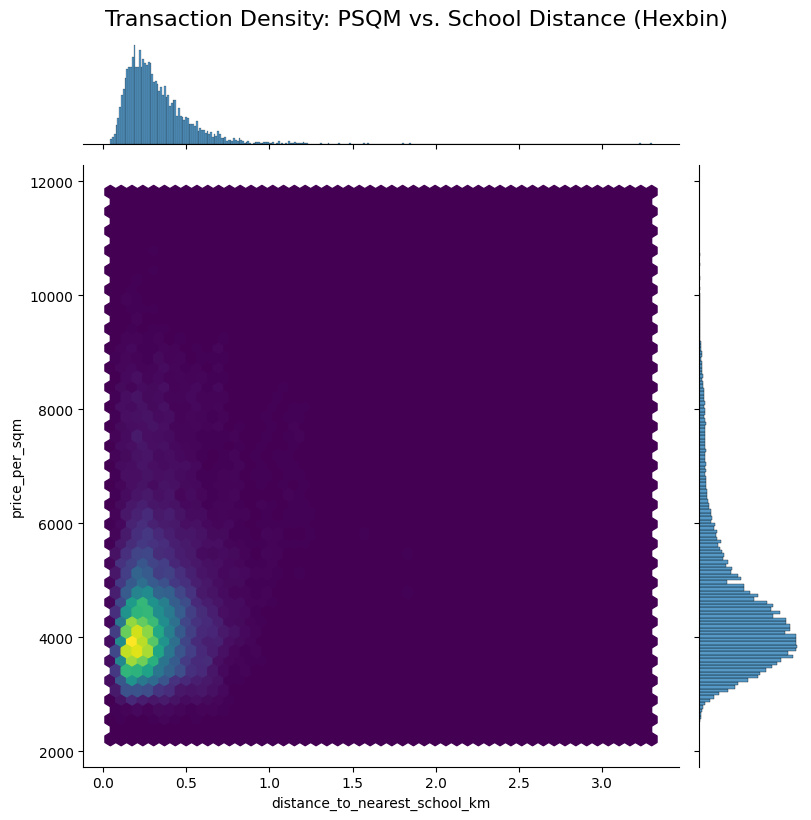

In [115]:
# Create the Joint Plot using the 'hex' kind
# 'hex' creates a heatmap using hexagons, showing density clearly
sns.jointplot(
    data=df_final,
    x='distance_to_nearest_school_km',
    y='price_per_sqm',
    kind='hex',
    height=8,
    cmap='viridis' # A visually appealing color map
)

plt.suptitle(
    'Transaction Density: PSQM vs. School Distance (Hexbin)',
    y=1.02,
    fontsize=16
)
plt.show()

### **Strong Price Premium:** The highest density of transactions is clustered tightly between $0.0 \text{ km}$ and $0.6 \text{ km}$ distance and in the high PSQM range ($\text{S\$4,000/sqm}$ to $\text{S\$8,000/sqm}$), confirming a significant price premium for close school proximity.

### **Price Decay:** As the distance to the nearest school increases (moving past $1.0 \text{ km}$), the density of transactions quickly fades, and the density does not extend to the highest PSQM levels.

### **Market Concentration:** The visualization confirms that the vast majority of housing transactions ($>90\%$) occur within $1.0 \text{ km}$ of a school, highlighting the importance of this amenity in the market.

KeyError: 'distance_to_nearest_mall_km'

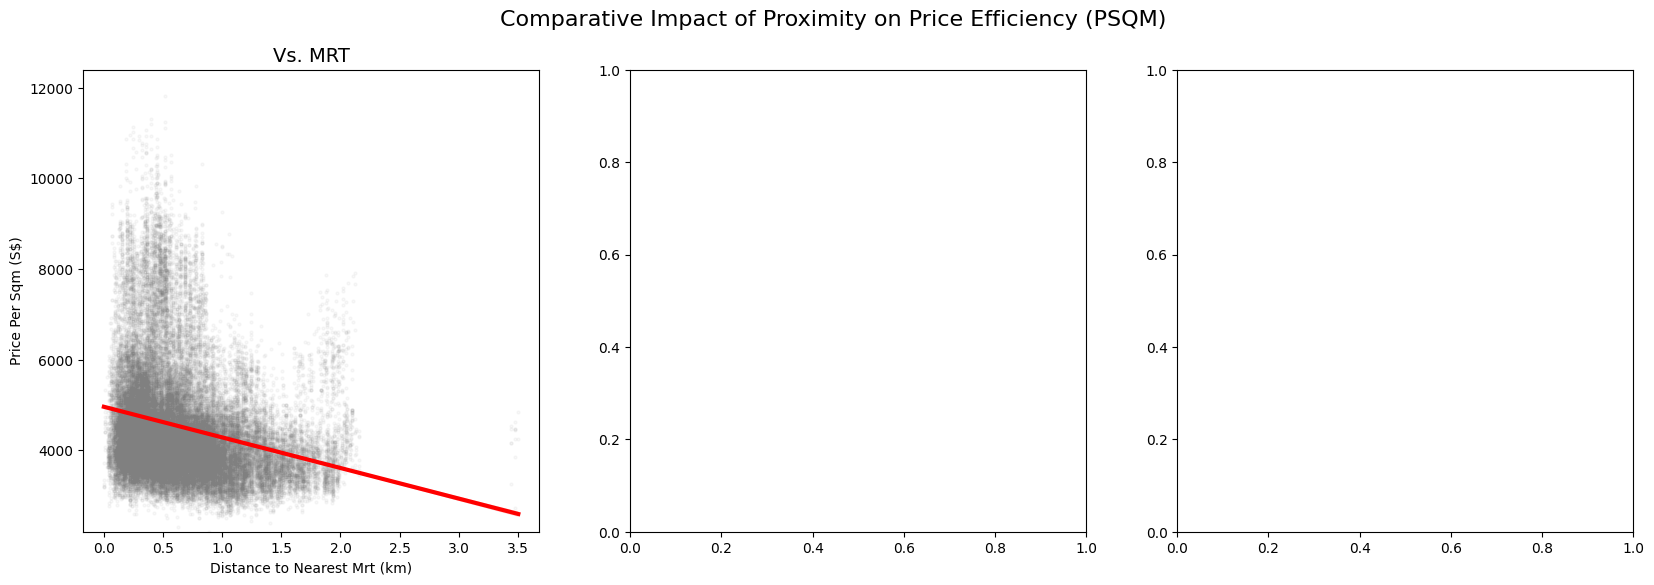

In [125]:
# Define the features to compare (assuming these are defined elsewhere)
distance_features = [
    'distance_to_nearest_mrt_km',
    'distance_to_nearest_mall_km',
    'distance_to_nearest_school_km'
]
PRICE_FEATURE = 'price_per_sqm' # Assuming this is the correct column name

# --- Performance Enhancement: Sample Data ---
# 1. CHANGE: Sample is now created from df_final
df_sample = df_final.sample(n=50000, random_state=42)

# Create a figure with 1 row and 3 columns (subplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparative Impact of Proximity on Price Efficiency (PSQM)', fontsize=16)

# 2. CHANGE: Min/max values are retrieved from the sampled data (which came from df_final)
y_min = df_sample[PRICE_FEATURE].min()
y_max = df_sample[PRICE_FEATURE].max()

# Iterate through the distance features to create each plot
for i, feature in enumerate(distance_features):
    ax = axes[i]

    # Create the Regression Plot for the current feature
    sns.regplot(
        data=df_sample, # Plotting uses the sample derived from df_final
        x=feature,
        y=PRICE_FEATURE,
        ax=ax,
        scatter_kws={'alpha': 0.05, 's': 5, 'color': 'gray'}, # Use small, transparent dots
        line_kws={'color': 'red', 'lw': 3}, # Bold red line for the trend
        ci=95, # Show confidence interval
    )

    # Set titles and labels
    # Use only the last word of the feature name for cleaner labels (e.g., 'mrt')
    # Use .upper() and .capitalize() for clean titles
    label = feature.split('_')[-2]
    ax.set_title(f'Vs. {label.upper()}', fontsize=14)
    ax.set_xlabel(f'Distance to Nearest {label.capitalize()} (km)')
    ax.set_ylabel('Price Per Sqm (S$)')
    ax.set_ylim(y_min, y_max * 1.05) # Consistent Y-axis scale is KEY for comparison

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.show()

### **School Proximity (Highest Premium):** The highest PSQM density is concentrated in a very narrow band: $\mathbf{0.0 \text{ km} \text{ to } 0.6 \text{ km}}$ from a school. This confirms that the price premium for school access is highly localized.This localized premium is substantial, as the highest PSQM sales cluster in this immediate zone.The premium decays rapidly and substantially; its strong influence virtually disappears past the $\mathbf{1.0 \text{ km}}$ mark.

### **MRT Proximity (Fundamental Driver):** The price efficiency of a property is fundamentally tied to its proximity to the MRT.The regression line shows a consistent negative correlation (price decreases as distance increases), establishing transit accessibility as a non-negotiable factor that supports the base value of a property.The penalty (price drop) for moving away from an MRT is faster and more severe than the penalty for moving away from a Mall, indicating that transit access is the higher priority of the two.

### **Scarcity and Dual Accessibility:** The absolute highest PSQM properties require $\mathbf{dual proximity}$: they must be close to both the MRT and a Mall ($\mathbf{X < 0.5 \text{ km}}$ and $\mathbf{Y < 0.5 \text{ km}}$).Due to the scarcity of these perfect locations, the market assigns the ultimate price premium to the few properties that achieve this balance.When forced to choose between amenities, transit (MRT) is often prioritized over commercial amenities (Mall), meaning proximity to the train line supports a higher price floor.

KeyError: "['distance_to_nearest_mall_km'] not in index"

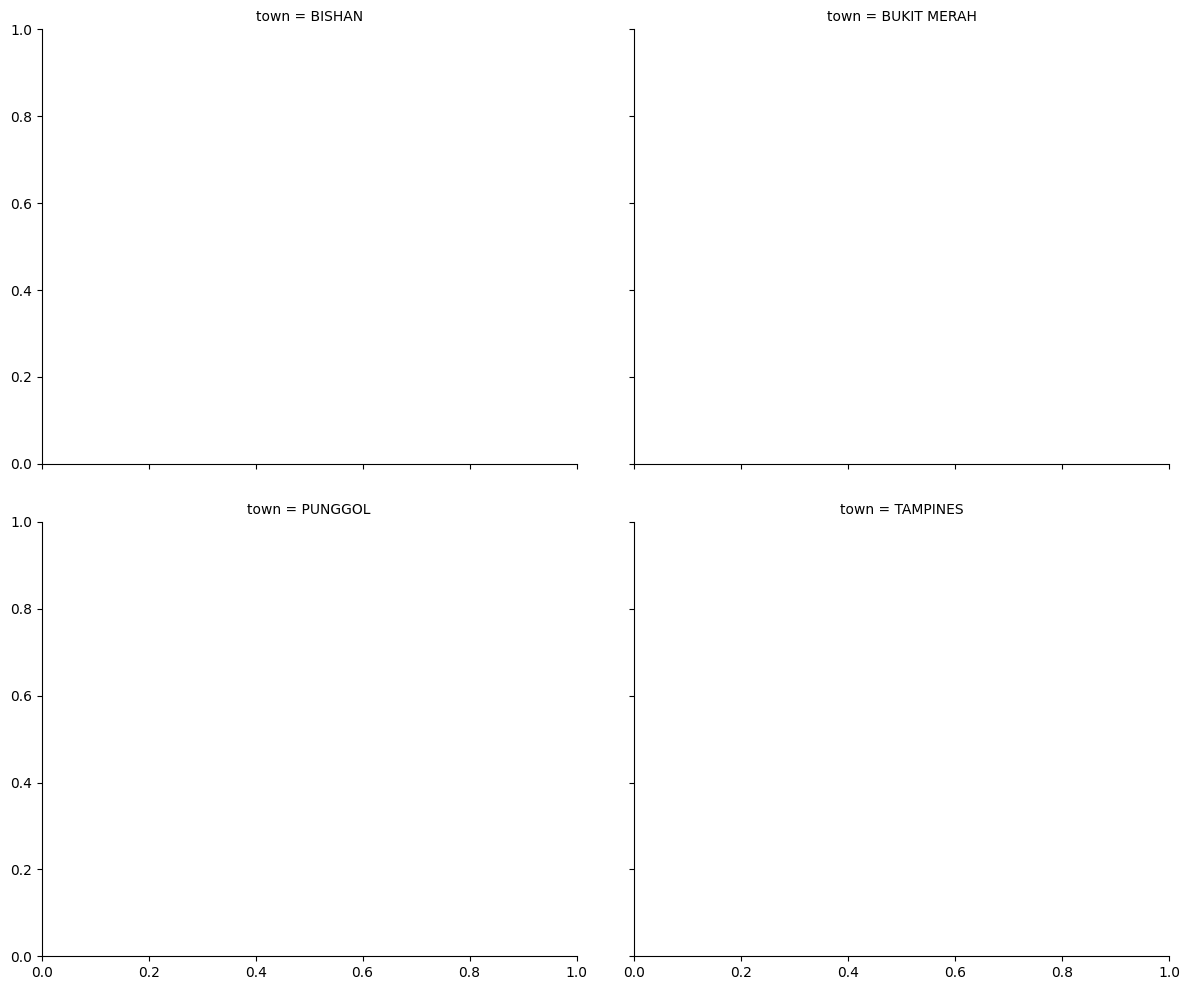

In [126]:
# Define the features
X_FEATURE = 'distance_to_nearest_mrt_km'
Y_FEATURE = 'distance_to_nearest_mall_km'

# Select key towns for the facet grid (strategic sample for clear comparison)
key_towns = ['BISHAN', 'PUNGGOL', 'TAMPINES', 'BUKIT MERAH']

# Filter the data to include only the selected towns (assumes df_final is the main DataFrame)
df_facet = df_final[df_final['town'].isin(key_towns)].copy()

# Create the FacetGrid object
g = sns.FacetGrid(
    df_facet,
    col='town',
    col_wrap=2,
    height=5,
    aspect=1.2, # Width-to-height ratio
    sharex=True,
    sharey=True
)

# Map the density plot (KDE contours) onto the grid
# This visualizes the clustering of transactions (density) across the two distances
g.map(
    sns.kdeplot,
    X_FEATURE,
    Y_FEATURE,
    fill=True,
    cmap='viridis',
    levels=10,
    alpha=0.8
)

# Enhance plot appearance
# Set the main title
g.fig.suptitle('Location Trade-Off Density by Selected Town', y=1.02, fontsize=16)

# Set the axis labels across the entire grid
g.set_axis_labels('Distance to Nearest MRT (km)', 'Distance to Nearest Mall (km)')

# Adjust the subplot titles (set to the town name)
g.set_titles("Town: {col_name}")

plt.show()

# **Why we chose these locations**
### **Strategic Contrast:** The selection of Bishan, Punggol, Tampines, and Bukit Merah provides a strategic cross-section of Singapore’s HDB landscape to maximize insight into the accessibility trade-off.

### **Maturity and Planning Focus:** Bishan and Bukit Merah were chosen as examples of mature, high-value estates. Analyzing them helps identify the optimal dual proximity found in land-scarce, established areas.

### Punggol represents a new, peripheral town, allowing the analysis of modern accessibility strategies and infrastructure planning trends.

### **Regional Dominance:** Tampines was included as a successful regional center to gauge if its strong, self-sufficient commercial amenities reduce the buyer's dependency on proximity to the central MRT lines.

# **What the graphs tell us**



### **Bishan (Ideal Optimization):** The tight, centralized cluster near the origin (0 km MRT, 0 km Mall) signifies Optimized Dual Proximity. This shape is the visual fingerprint of successful, efficient mature urban planning, leading to high location value.

### **Tampines (Regional Balance):** The elongated, dense cluster shows a deliberate Balanced Trade-Off. Planning successfully integrated commerce and transport across a large area, confirming its status as a self-sufficient regional hub.

### **Bukit Merah / Punggol (Constraints & Spread):** The wide, dispersed, or multi-clustered shapes reflect Geographical Spread or Planning Constraints. This indicates a lack of uniform dual proximity, where residents are forced to make clear trade-offs between transport and amenities.

In [232]:
df_final.head()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64471 entries, 0 to 64470
Data columns (total 79 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   month                          64471 non-null  datetime64[ns]
 1   block                          64471 non-null  object        
 2   street_name                    64471 non-null  object        
 3   storey_range                   64470 non-null  object        
 4   floor_area_sqm                 64470 non-null  float64       
 5   flat_model                     64470 non-null  object        
 6   lease_commence_date            64470 non-null  float64       
 7   resale_price                   64470 non-null  float64       
 8   price_per_sqm                  64470 non-null  float64       
 9   trans_year                     64471 non-null  int32         
 10  flat_age                       64470 non-null  float64       
 11  remaining_lease

In [297]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd


drop_cols = [
    # identifiers
    'month', 'block', 'street_name', 'full_address', 'postal_code', 'storey_range','town','flat_model',

    # redundant categorical (keep either one-hot or raw)
    'town', 'flat_type', 'nearest_mrt_name', 'nearest_school_name', 'nearest_mall_name_x',

    # redundant lease/age features (keep only one)
    'remaining_lease', 'lease_commence_date', 'flat_age','schools_within_1km',
    'schools_within_1_2km',

    # derived target-related
    'price_per_sqm','trans_year',

    # leakage features
    #'town_median_psqm', 'town_mean_psqm', 'town_avg_lease', 'town_count',
    #'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease', 'flat_type_count',


    # raw coordinates
    'latitude', 'longitude',
    'nearest_mrt_lat', 'nearest_mrt_lng',
    'nearest_school_lat', 'nearest_school_lon',
    'nearest_mall_lat_x', 'nearest_mall_lon_x',
    'nearest_mall_lat_y', 'nearest_mall_lon_y',

    # names/labels
    'nearest_mrt_name', 'nearest_school_name', 'nearest_mall_name_x', 'nearest_mall_name_y'
]
df_model2 = df_final.drop(columns = drop_cols, errors = 'ignore')



In [298]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64471 entries, 0 to 64470
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   floor_area_sqm                 64470 non-null  float64
 1   resale_price                   64470 non-null  float64
 2   remaining_lease_years          64470 non-null  float64
 3   town_median_psqm               64471 non-null  float64
 4   town_mean_psqm                 64471 non-null  float64
 5   town_avg_lease                 64471 non-null  float64
 6   town_count                     64471 non-null  int64  
 7   flat_type_median_psqm          64471 non-null  float64
 8   flat_type_mean_psqm            64471 non-null  float64
 9   flat_type_avg_lease            64471 non-null  float64
 10  flat_type_count                64471 non-null  int64  
 11  storey_avg                     64470 non-null  float64
 12  town_ANG MO KIO                64471 non-null 

In [299]:
df_model2.isna().sum()

,0
floor_area_sqm,1
resale_price,1
remaining_lease_years,1
town_median_psqm,0
town_mean_psqm,0
town_avg_lease,0
town_count,0
flat_type_median_psqm,0
flat_type_mean_psqm,0
flat_type_avg_lease,0


In [300]:
df_model2.head()

,floor_area_sqm,resale_price,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,...,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,distance_to_nearest_mrt_km,distance_to_nearest_school_km,distance_to_nearest_mall_km_x,distance_to_nearest_mall_km_y
0,44.0,232000.0,61.0,4363.6364,4719.6283,64.6613,2997,5000.0000,5096.8352,75.6170,...,1.0,0.0,0.0,0.0,0.0,0.0,1.011433,0.229176,1.031166,1.031166
1,67.0,250000.0,60.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,...,0.0,1.0,0.0,0.0,0.0,0.0,1.270031,0.242224,0.869079,0.869079
2,67.0,262000.0,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,...,0.0,1.0,0.0,0.0,0.0,0.0,1.068607,0.775872,1.529046,1.529046
3,68.0,265000.0,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,...,0.0,1.0,0.0,0.0,0.0,0.0,0.947097,0.517984,0.891974,0.891974
4,67.0,265000.0,62.0,4363.6364,4719.6283,64.6613,2997,4298.5075,4514.2693,64.5009,...,0.0,1.0,0.0,0.0,0.0,0.0,1.091392,0.781444,1.572922,1.572922


In [301]:
df_model2.columns

Index(['floor_area_sqm', 'resale_price', 'remaining_lease_years',
       'town_median_psqm', 'town_mean_psqm', 'town_avg_lease', 'town_count',
       'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease',
       'flat_type_count', 'storey_avg', 'town_ANG MO KIO', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM',
       'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE',
       'flat_type_MULTI-GENERATION', 'distance_to_nearest_mrt_km',
    

In [302]:
num_cols = df_model2.select_dtypes(include=['int64','float64']).columns

df_model2[num_cols] = df_model2[num_cols].fillna(df_model2[num_cols].median())


In [303]:
X = df_model2.drop("resale_price", axis=1)
y = df_model2["resale_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [305]:

# Build and train Random Forest
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))




rf_importances = pd.Series(
    model.feature_importances_,
    index=X_train.columns[:len(model.feature_importances_)]  # align lengths
).sort_values(ascending=False).head(10)

print("\nTop 10 RF Feature Importances:\n", rf_importances)


MAE: 19667.60807651791
R²: 0.9674003017167948
MAPE: 4.58 %
MSE: 780347081.79
RMSE: 27934.69

Top 10 RF Feature Importances:
 floor_area_sqm                   0.446704
town_mean_psqm                   0.155487
town_median_psqm                 0.144533
remaining_lease_years            0.089920
town_avg_lease                   0.029201
distance_to_nearest_mrt_km       0.025913
storey_avg                       0.024670
flat_type_median_psqm            0.015696
flat_type_mean_psqm              0.014230
distance_to_nearest_school_km    0.012237
dtype: float64


In [309]:

# --- XGBoost ---
model2 = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model2.fit(X_train, y_train)

# Predict
y_pred = model2.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

xgb_importances = pd.Series(
    model2.feature_importances_,
    index=X_train.columns[:len(model2.feature_importances_)]  # align lengths
).sort_values(ascending=False).head(10)
print("\nTop 10 XGB Feature Importances:\n", xgb_importances)


MAE: 21254.379490160914
R²: 0.9649702441002641
MAPE: 4.98 %
MSE: 838515975.04
RMSE: 28957.14

Top 10 XGB Feature Importances:
 town_mean_psqm           0.280501
flat_type_count          0.134635
town_median_psqm         0.107389
flat_type_4 ROOM         0.088115
flat_type_median_psqm    0.088034
floor_area_sqm           0.080854
town_avg_lease           0.024221
remaining_lease_years    0.017990
town_CENTRAL AREA        0.014964
storey_avg               0.013918
dtype: float32


In [310]:
from sklearn.pipeline import Pipeline
numeric_features = X.columns
scaler = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"
)
lr_pipeline = Pipeline(steps=[
    ("preprocessor", scaler),
    ("model", LinearRegression())
])
# evaluation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

MAE: 21254.379490160914
R²: 0.9649702441002641
MAPE: 4.98 %
MSE: 838515975.04
RMSE: 28957.14


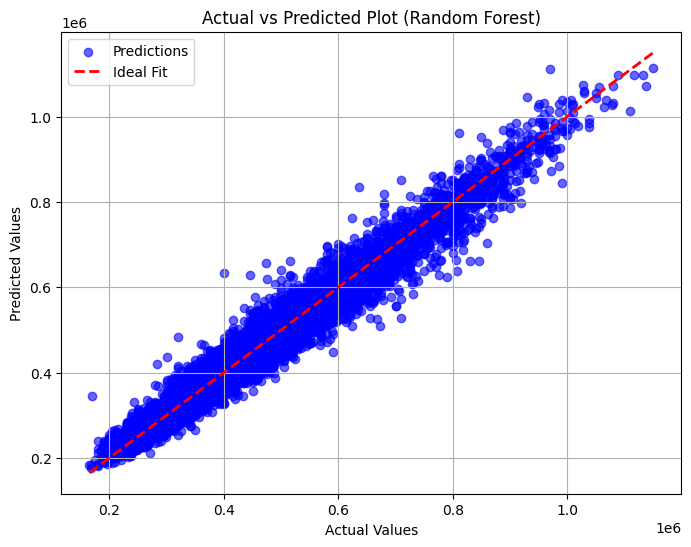

In [312]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predictions")

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Plot (Random Forest)")
plt.legend()
plt.grid(True)
plt.show()



In [317]:

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Add residuals (error = actual - predicted)
results_df["Residual"] = results_df["Actual"] - results_df["Predicted"]

# Preview first 10 rows
print(results_df.head(10))

     Actual     Predicted     Residual
0  330000.0  360239.62500 -30239.62500
1  430000.0  434325.37500  -4325.37500
2  500000.0  498524.75000   1475.25000
3  310000.0  328664.90625 -18664.90625
4  376000.0  389222.96875 -13222.96875
5  265000.0  282894.62500 -17894.62500
6  500000.0  496142.50000   3857.50000
7  260000.0  258723.03125   1276.96875
8  543000.0  567608.93750 -24608.93750
9  680000.0  703575.25000 -23575.25000
